In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import pickle
import dask.dataframe as dd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import subprocess
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
import scipy.stats as stats

import numpy as np
import cvxpy as cp

/home/tbellagio/.local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#os.listdir('../../grene/data/')

In [3]:
fc = pd.read_csv('../../grene/data/merged_samples_data.csv')

In [4]:
fc = fc[['sample_name', 'total_flower_counts']]

fc.columns = ['sample', 'fc']

In [5]:
fc['site'] = fc['sample'].str.split('_').str[0]

In [6]:
fc[fc['site'] == '33']

,sample,fc,site
393,33_1_1,7,33
394,33_2_4,20,33
395,33_2_5,20,33
396,33_2_6,28,33
397,33_2_9,23,33
398,33_2_11,25,33
399,33_2_12,43,33


In [7]:
#pd.read_csv('../../grene/data/samples_data.csv')['']

In [223]:
delta_p_file = 'delta_p.csv'
delta_p = dd.read_csv(delta_p_file, sep = ',')

delta_p = delta_p.compute() 

delta_p = delta_p.reset_index(drop=True)

In [224]:
grenenet_variants_id_pos[grenenet_variants_id_pos['variants_id'].isin(['2_1312677', '5_3578402', '5_9705721', '5_22508548', '1_21185782'])].index

Index([546144, 870182, 2595232, 2746668, 3130479], dtype='int64')

In [ ]:
## only keep interesting snps 

In [32]:
# the ones selected by multipel splits 
grenenet_variants_id_pos = pd.read_csv('grenenet_variants_id_pos.csv').reset_index()

selected_snps_across_splits = pd.read_csv('selected_snps_across_splits.csv')

selected_snps_across_splits = selected_snps_across_splits.merge(grenenet_variants_id_pos, right_on = 'variants_id', left_on = 'snp')

#delta_p_selected_snps_across_splits =  delta_p.iloc[selected_snps_across_splits['index'], :]

#delta_p_selected_snps_across_splits.to_csv('delta_p_selected_snps_across_splits.csv')

#delta_p_selected_snps_meandeltap = delta_p.iloc[[2380920, 2380921, 2380926, 1675597, 1675732, 2351273,  439519,
#      2871809], : ]

#delta_p_selected_snps_meandeltap.to_csv('delta_p_selected_snps_meandeltap.csv')

In [33]:
selected_snps_across_splits

,snp,set_number,index,variants_id,variants_pos
0,5_10124717,1,2761347,5_10124717,10124717
1,1_13028520,1,326929,1_13028520,13028520
2,1_23248787,1,622858,1_23248787,23248787
3,1_27600639,1,766011,1_27600639,27600639
4,1_28863277,1,793489,1_28863277,28863277
...,...,...,...,...,...
4814,5_26918679,64,3234167,5_26918679,26918679
4815,5_4946941,64,2619782,5_4946941,4946941
4816,4_11305880,64,2350982,4_11305880,11305880
4817,2_9902238,65,1131905,2_9902238,9902238


In [ ]:
pd.read_csv('delta_p_selected_snps_meandeltap.csv')

In [117]:
delta_p = pd.read_csv('delta_p_selected_snps_across_splits.csv').set_index('Unnamed: 0')

In [118]:
delta_p.shape

(4819, 745)

In [119]:
final_gen = pd.read_csv('../final_gen.csv')['sample_name'].values

delta_p = delta_p[final_gen]

In [120]:
delta_p.shape

(4819, 355)

In [93]:
#os.listdir('/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_hapFIRE_delta_p_LDpruned.txt')

In [43]:
delta_p_ldp = pd.read_csv('/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_hapFIRE_delta_p_LDpruned.txt', sep = '\t')

In [11]:
all_af = pd.DataFrame()
for split_number in range(100):
    output_file_af = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/r2_pred_allele_freq.csv' 
    af = pd.read_csv(output_file_af)
    af['site'] = af['sample'].str.split('_').str[0]
    all_af = pd.concat([all_af,af])

In [12]:
with open('splits_samples.pkl', 'rb') as file:
    splits_samples = pickle.load(file)

len(splits_samples) ## 100

100

In [44]:
es = pd.read_csv(f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/effect_sizes_simple_full_genome.csv')['V1']

In [121]:
clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')

clim_sites_during_exp['site'] = clim_sites_during_exp['site'].astype(str)

In [122]:
clim_sites_during_exp = clim_sites_during_exp[['site', 'bio1']]

In [123]:
sites = delta_p.columns.str.split('_').str[0]

In [135]:
delta_p_ldpt = delta_p.T

In [136]:
delta_p_ldpt.shape

(355, 4819)

In [138]:
delta_p_ldpt['site'] = delta_p_ldpt.index.str.split('_').str[0]
delta_p_ldpt['gen'] = delta_p_ldpt.index.str.split('_').str[1]

delta_p_ldpt['sample'] = delta_p_ldpt.index

In [139]:
delta_p_ldpt = delta_p_ldpt.merge(clim_sites_during_exp)

In [140]:
delta_p_ldpt = delta_p_ldpt.merge(fc)

In [193]:
delta_pt_mean = delta_p_ldpt.groupby('site')[delta_p_ldpt.columns[:-5]].mean()

In [142]:
delta_pt_std = delta_p_ldpt.groupby('site')[delta_p_ldpt.columns[:-5]].var() #/ delta_pt.groupby('site')[delta_pt.columns[:-2]].mean()

In [143]:
delta_pt_std.shape

(31, 4819)

In [194]:
delta_pt_mean = delta_pt_mean.reset_index().merge(clim_sites_during_exp)

In [145]:
delta_pt_std = delta_pt_std.reset_index().merge(clim_sites_during_exp)

In [146]:
delta_pt_std

,site,2761347,326929,622858,766011,793489,814141,1001179,1061365,1153176,...,2776467,2016156,577139,2148644,3234167,2619782,2350982,1131905,1783721,bio1
0,1,0.054540,0.024543,1.764715e-02,7.068287e-04,0.004757,0.006152,0.002208,0.000704,0.019441,...,0.003034,0.020161,7.354997e-04,0.010597,7.749749e-04,0.021671,0.025237,0.034456,0.006585,10.743906
1,10,0.060090,0.072159,9.687767e-02,2.762706e-02,0.105983,0.040151,0.032570,0.039626,0.050686,...,0.114704,0.085726,3.742996e-02,0.067263,2.585742e-02,0.083392,0.087051,0.023100,0.094826,20.550923
2,11,0.032100,0.090649,8.666860e-02,1.593454e-02,0.009112,0.039099,0.014359,0.012339,0.087551,...,0.018350,0.066204,5.642657e-03,0.093324,1.113051e-03,0.015750,0.118257,0.070916,0.011637,13.801396
3,12,0.074115,0.081776,1.968848e-03,1.733133e-03,0.012185,0.027065,0.004749,0.008631,0.017270,...,0.006503,0.084760,1.259093e-03,0.058594,7.338602e-03,0.034327,0.055303,0.076462,0.009250,12.957162
4,13,0.019204,0.074524,3.060762e-02,1.690306e-02,0.099672,0.091544,0.053741,0.035440,0.049244,...,0.031728,0.032559,8.090285e-02,0.058697,2.282456e-02,0.075060,0.080778,0.007107,0.079861,20.412710
5,2,0.038794,0.030429,2.422634e-03,4.394812e-04,0.055200,0.013130,0.012176,0.012473,0.015473,...,0.024044,0.014166,4.612289e-03,0.039181,4.865430e-04,0.017024,0.051226,0.026714,0.002761,15.594627
6,23,0.002087,0.001289,3.293606e-04,5.822140e-05,0.000825,0.001686,0.000202,0.000215,0.000354,...,0.000656,0.001686,8.866924e-05,0.001375,1.012523e-04,0.000911,0.000840,0.002281,0.000755,7.290877
7,24,0.028167,0.031796,7.532889e-03,6.013192e-04,0.011664,0.006546,0.002698,0.003443,0.015586,...,0.017623,0.019500,2.459419e-03,0.012736,9.215712e-04,0.016834,0.029842,0.040408,0.012285,6.008861
8,25,0.017556,0.023733,6.894590e-03,5.152643e-03,0.007436,0.010063,0.005930,0.007775,0.019733,...,0.014126,0.015803,3.168338e-03,0.018773,4.082496e-03,0.012347,0.019216,0.023570,0.006133,11.393515
9,26,0.060712,0.073711,5.760952e-03,9.361240e-04,0.051882,0.018525,0.003986,0.005776,0.014725,...,0.075957,0.031782,7.747805e-03,0.061604,6.379581e-04,0.071094,0.051620,0.022513,0.003593,21.603356


In [147]:
delta_pt_std[1783721]

0     0.006585
1     0.094826
2     0.011637
3     0.009250
4     0.079861
5     0.002761
6     0.000755
7     0.012285
8     0.006133
9     0.003593
10    0.000002
11    0.047612
12    0.001000
13    0.000009
14    0.014314
15    0.000459
16    0.031326
17    0.000821
18    0.006575
19    0.004261
20    0.036542
21    0.009912
22    0.001002
23    0.034579
24    0.002318
25    0.001578
26    0.000176
27    0.000452
28    0.003007
29    0.004313
30    0.012186
Name: 1783721, dtype: float64

In [148]:
#delta_pt_std[[2380921, 2380922, 2380927, 1675598, 1675733 ,2351274, 439520, 2871810]]

<Axes: xlabel='bio1', ylabel='1783721'>

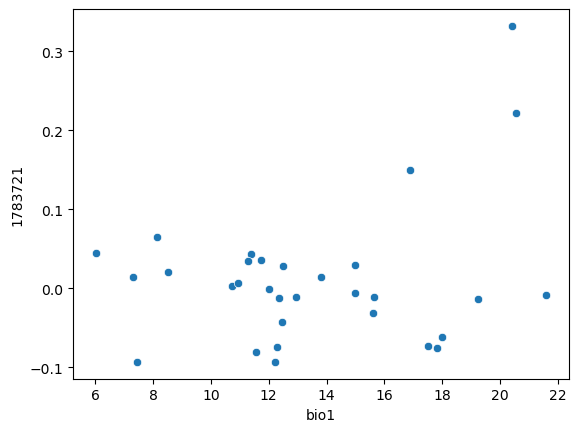

In [149]:
sns.scatterplot(data = delta_pt_mean, x = 'bio1', y = 1783721)

In [150]:
delta_pt_std.columns[10:100]

Index([1834557, 1918763, 1961449, 1984916,  180664, 2001175, 2335802, 2474363,
       2556626, 2671646, 2797697, 2864281, 3229303,  672810, 1066850, 1217913,
       1301363, 1513906, 2149377,  104651,   20002, 3110954, 1917457, 2272233,
       2296363, 2583966, 3196993,   17676,   26766,  528241,  784484,  827041,
        828760, 1151820, 1153876, 2335186, 2966819, 2986424, 3206553,   81980,
         89954,  405319, 1377228, 1593465, 1647136, 2659888, 2848237, 2864338,
       3011367, 1887415, 2658949, 2968362,   21029,  275552,  281151,  296846,
        421779,  433808,  436821,  441823,  452397,  470757,  475864,  483101,
        487108,  488459,  495501,  516151,  528459,  529534,  530153,  541209,
        569642,  591474,  636338,  730675,  771270,  779542,  844359,  844493,
        261638, 1813658,  255350,  232952,   94288,   99821,  284492,  403076,
        487142,  844498],
      dtype='object')

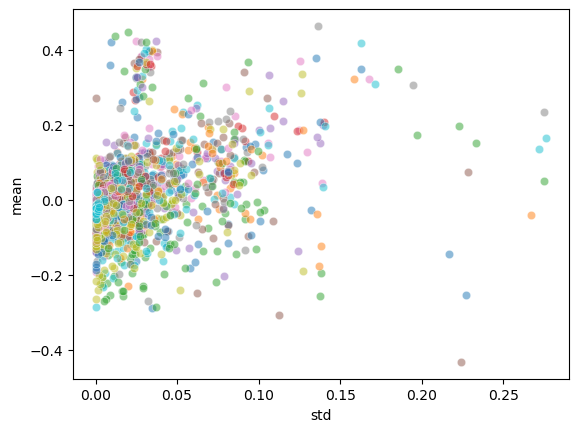

In [151]:
for i in delta_pt_std.columns[10:100]:
    sns.scatterplot(x = delta_pt_std[i], y = delta_pt_mean[i], alpha = 0.5)
    plt.xlabel('std')
    plt.ylabel('mean')

Text(0, 0.5, 'mean')

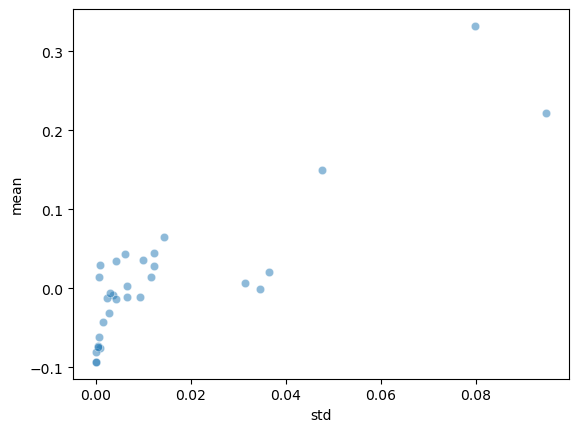

In [152]:
sns.scatterplot(x = delta_pt_std[1783721], y = delta_pt_mean[1783721], alpha = 0.5)
plt.xlabel('std')
plt.ylabel('mean')

In [153]:
delta_pt[[9994,'site', 'bio1']]

NameError: name 'delta_pt' is not defined

In [ ]:
delta_pt_std[['site', 9994]].dtypes

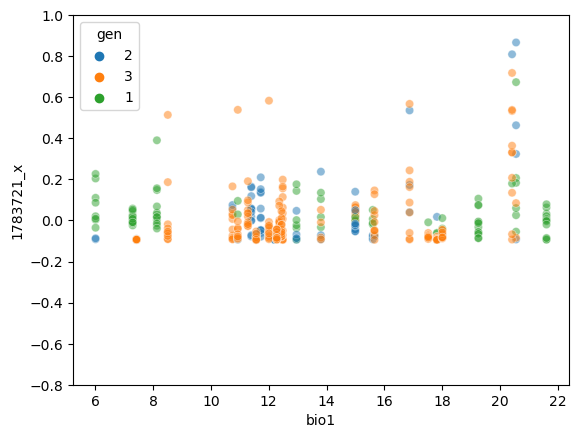

In [155]:
snp_index = 1783721
std_all = delta_p_ldpt[[snp_index,'site', 'bio1','gen']].merge(delta_pt_std[['site', snp_index]], on = 'site')
sns.scatterplot(data = std_all, x = 'bio1', y = f'{snp_index}_x', hue = f'gen', alpha = 0.5)
plt.ylim(-0.8, 1);

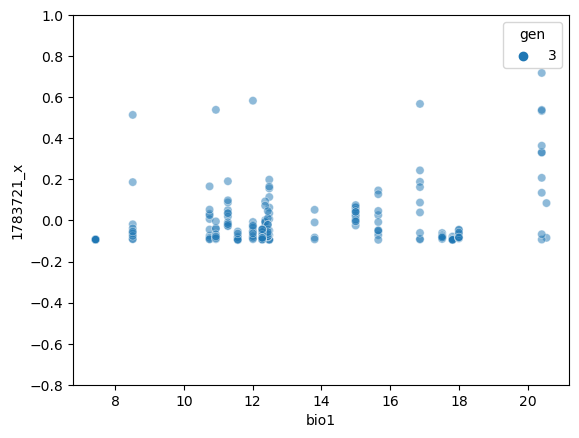

In [161]:
snp_index = 1783721
std_all = delta_p_ldpt[[snp_index,'site', 'bio1','gen']].merge(delta_pt_std[['site', snp_index]], on = 'site')
std_all = std_all[std_all['gen']=='3']
sns.scatterplot(data = std_all, x = 'bio1', y = f'{snp_index}_x', hue = f'gen', alpha = 0.5)
plt.ylim(-0.8, 1);

In [78]:
delta_p_ldpt.head()

,2761347,326929,622858,766011,793489,814141,1001179,1061365,1153176,1834557,...,2148644,3234167,2619782,2350982,1131905,1783721,site,sample,bio1,fc
0,0.025121,0.004543,-0.014327,0.053604,0.019747,0.014196,-0.012804,0.003011,0.020630,0.045512,...,-0.010015,0.011908,0.012232,-0.017839,0.019002,0.003342,1,1_1_1,10.743906,146
1,0.106880,0.026484,0.021103,0.005589,0.039299,0.060031,-0.035624,-0.033109,0.080579,0.041729,...,-0.011870,0.000228,0.016800,-0.039034,-0.034341,-0.014286,1,1_1_2,10.743906,235
2,-0.018933,-0.042135,-0.016650,0.014676,-0.022418,-0.002979,0.011873,0.009189,0.023515,0.010118,...,-0.067031,0.008206,-0.027823,-0.020542,0.031367,0.036580,1,1_1_3,10.743906,229
3,0.078853,0.023446,-0.012230,0.017713,0.007270,0.039973,0.000356,0.002205,0.056243,0.029073,...,-0.011086,0.013695,0.061849,-0.014579,-0.074900,0.032436,1,1_1_4,10.743906,233
4,0.119385,0.010743,0.006427,-0.010044,0.081171,0.002768,-0.006530,-0.029130,0.088071,-0.005108,...,0.090632,-0.000426,0.041307,-0.026983,-0.117692,0.018366,1,1_1_5,10.743906,226


In [115]:
delta_p_ldpt[['bio1', 'site']].drop_duplicates().sort_values('bio1')

,bio1,site
125,6.008861,24
113,7.290877,23
158,7.425145,27
201,8.130012,37
261,8.506768,48
0,10.743906,1
213,10.927050,42
249,11.277027,46
135,11.393515,25
319,11.564501,55


In [85]:
delta_p_ldpt['bio1'].sort_values().unique()

array([ 6.00886076,  7.29087708,  7.42514505,  8.13001213,  8.50676815,
       10.74390569, 10.92705032, 11.27702712, 11.39351514, 11.56450148,
       11.72128045, 12.0052842 , 12.19870286, 12.27648105, 12.36221735,
       12.44016886, 12.48166878, 12.95716202, 13.80139596, 14.98907915,
       14.99635535, 15.5946267 , 15.65428636, 16.86830853, 17.51347443,
       17.8151689 , 18.0009508 , 19.24805142, 20.41271049, 20.55092345,
       21.60335581])

In [116]:
delta_p_ldpt[delta_p_ldpt['site'] == '10']

,2761347,326929,622858,766011,793489,814141,1001179,1061365,1153176,1834557,...,2148644,3234167,2619782,2350982,1131905,1783721,site,sample,bio1,fc
67,-0.124797,0.009271,0.011656,0.057266,-0.017090,-0.007013,0.058027,0.037131,0.024863,0.183472,...,-0.010030,0.079728,0.341309,0.051787,-0.244066,0.206853,10,10_1_3,20.550923,21
68,-0.435502,0.304916,0.130002,0.062777,-0.077293,0.093505,0.027907,0.157826,-0.127144,0.278838,...,0.011294,0.201544,0.686220,0.178693,-0.407686,0.673529,10,10_1_4,20.550923,12
69,0.176022,-0.116211,-0.025281,-0.020994,-0.060080,0.204721,0.062332,0.171608,0.008646,0.247950,...,-0.042970,0.042016,0.042108,0.136951,-0.120317,0.025641,10,10_1_6,20.550923,33
70,0.062958,0.131954,0.079296,0.056372,-0.073171,0.201887,0.261857,0.235050,0.060217,0.267855,...,-0.091479,0.025042,0.037084,0.053200,-0.158457,0.183213,10,10_1_7,20.550923,32
71,0.241868,0.154028,0.054334,0.271336,-0.076392,0.031315,-0.048172,0.105760,0.494369,0.264368,...,-0.111896,-0.010245,0.348938,-0.341765,-0.134648,-0.054595,10,10_1_11,20.550923,8
72,0.286920,-0.091608,0.044387,0.007067,-0.073457,0.072064,0.245452,0.215278,0.301297,0.171789,...,-0.074213,-0.008119,0.025570,-0.377097,-0.336529,0.060212,10,10_1_12,20.550923,21
73,0.414552,0.709229,0.876224,-0.024342,0.892708,-0.105582,-0.062188,-0.058324,-0.120457,0.450547,...,0.702444,-0.017505,0.806775,-0.665758,-0.424076,0.866875,10,10_2_1,20.550923,1
74,-0.144766,0.727681,-0.087595,-0.024972,0.476747,0.443265,-0.064728,-0.061162,-0.125659,0.460660,...,0.295267,-0.018572,0.407051,-0.264696,-0.015858,0.323764,10,10_2_5,20.550923,5
75,-0.132167,0.301400,-0.087851,-0.025214,0.475797,0.443097,0.345932,0.349756,0.282790,0.462398,...,0.249898,-0.018201,0.392755,-0.682242,-0.431045,-0.092327,10,10_2_8,20.550923,4
76,-0.121553,0.176399,0.734262,0.527966,-0.077269,-0.108652,0.489564,0.492645,0.301772,0.459382,...,-0.257853,0.532521,0.551506,0.049131,-0.432299,0.463568,10,10_2_9,20.550923,7


In [82]:
delta_p_ldpt[[1061365,'bio1']]

,1061365,bio1
0,0.003011,10.743906
1,-0.033109,10.743906
2,0.009189,10.743906
3,0.002205,10.743906
4,-0.029130,10.743906
...,...,...
740,-0.006465,19.248051
741,-0.042517,19.248051
742,0.011994,19.248051
743,-0.060369,19.248051


In [159]:
delta_p_ldpt.shape

(355, 4824)

In [165]:
delta_p_ldpt.columns = delta_p_ldpt.columns.astype(str
                           )

In [169]:
delta_p_ldpt['gen'] = delta_p_ldpt['gen'].astype(int)

In [178]:
delta_p_ldpt.columns

,2761347,326929,622858,766011,793489,814141,1001179,1061365,1153176,1834557,...,3234167,2619782,2350982,1131905,1783721,site,sample,gen,bio1,fc
0,-0.038061,-0.037858,0.137818,-0.014541,0.125874,0.073766,-0.046318,-0.047300,0.135857,0.094868,...,-0.011729,0.117413,-0.088420,-0.052274,0.057859,1,1_2_2,2,10.743906,194
1,0.182959,0.028005,0.106227,-0.020047,-0.051094,-0.070517,-0.045592,-0.042219,0.083471,-0.050722,...,-0.012560,0.010945,-0.038211,0.223185,0.075096,1,1_2_3,2,10.743906,117
2,-0.432908,-0.188673,0.043551,-0.024776,0.039734,0.000714,-0.062648,-0.060429,-0.024105,0.330667,...,-0.018843,-0.057550,0.042578,-0.194483,-0.091066,1,1_3_1,3,10.743906,24
3,0.092740,0.266878,0.389076,-0.024878,-0.044114,-0.107442,-0.061545,-0.060290,-0.040840,0.276629,...,-0.019024,-0.107780,0.112705,0.113072,0.165989,1,1_3_4,3,10.743906,20
4,0.074556,-0.060994,-0.038811,-0.018063,-0.016760,-0.076252,-0.055882,-0.054902,0.032898,-0.056650,...,-0.015715,-0.012893,0.016304,-0.204897,-0.074728,1,1_3_5,3,10.743906,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.035594,0.138910,-0.012009,0.043226,0.093248,0.045408,0.006833,-0.006465,-0.068079,-0.002129,...,0.011078,-0.035846,-0.105400,-0.074637,-0.005304,60,60_1_8,1,19.248051,24
351,0.167823,-0.060695,-0.063379,-0.009441,0.258766,0.192014,-0.051127,-0.042517,0.224106,0.229394,...,-0.013307,0.428168,-0.251050,-0.055862,-0.065353,60,60_1_9,1,19.248051,7
352,0.193052,0.024718,0.005580,-0.022571,0.318388,0.015823,0.028613,0.011994,-0.009213,-0.141496,...,-0.015845,-0.022262,-0.075976,-0.240031,0.074875,60,60_1_10,1,19.248051,21
353,0.291653,0.083782,-0.083986,0.062917,0.450434,0.144688,-0.060781,-0.060369,0.082704,0.243305,...,-0.018548,0.127231,-0.303109,-0.134950,-0.086157,60,60_1_11,1,19.248051,20


In [182]:
selected_snps_across_splits.tail(5)['index'].values

array([3234167, 2619782, 2350982, 1131905, 1783721])

In [221]:
grenenet_variants_id_pos[grenenet_variants_id_pos['variants_id'].isin(['2_1312677', '5_3578402', '5_9705721', '5_22508548', '1_21185782'])].index

Index([546144, 870182, 2595232, 2746668, 3130479], dtype='int64')

In [ ]:
## rf 

ValueError: Could not interpret value `546144` for parameter `y`

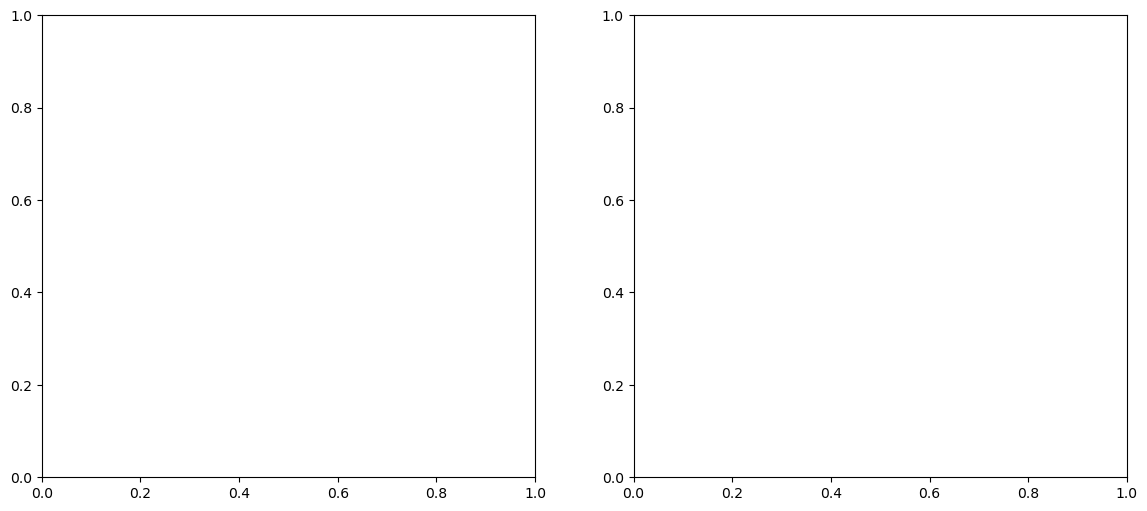

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load your data
# Assuming delta_p_ldpt is already loaded and formatted correctly

# List of SNP indices to plot
snp_indices =['546144', '870182', '2595232', '2746668', '3130479']  # example indices

for snp_index in snp_indices:
    # Set up a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # First subplot with hue based on 'fc'
    sns.scatterplot(ax=axs[0], x='bio1', y=snp_index, data=delta_p_ldpt, hue='fc', palette='icefire', legend=True)
    sns.regplot(ax=axs[0], data=delta_p_ldpt, x='bio1', y=snp_index, scatter=False)

    # Second subplot with hue based on 'gen'
    sns.scatterplot(ax=axs[1], x='bio1', y=snp_index, data=delta_p_ldpt, hue='gen', palette='viridis', legend=True)
    sns.regplot(ax=axs[1], data=delta_p_ldpt, x='bio1', y=snp_index, scatter=False)

    # Fit the linear model
    X = delta_p_ldpt['bio1'].values.reshape(-1, 1)  # Independent variable
    y = delta_p_ldpt[snp_index].values # Dependent variable
    model = LinearRegression().fit(X, y)
    r_squared = model.score(X, y)

    # Display R² on the first plot
    axs[0].text(x=max(delta_p_ldpt['bio1']), y=min(delta_p_ldpt[snp_index]), 
                s=f'$R^2 = {r_squared:.2f}$', color='black', fontsize=12,
                verticalalignment='bottom', horizontalalignment='right')

    # Print the coefficient
    print(f"Coefficient for SNP {snp_index}:", model.coef_)

    # Show the plots
    plt.tight_layout()
    plt.show()



Coefficient for SNP 3234167: [0.00309049]


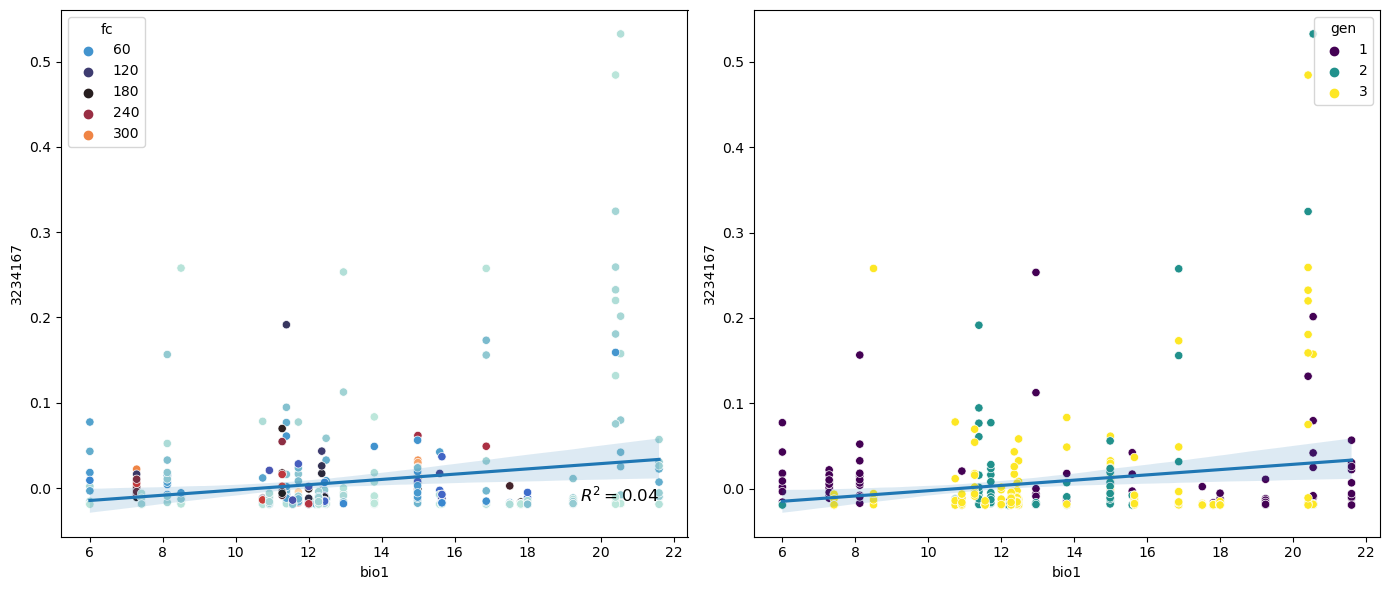

Coefficient for SNP 2619782: [0.01556088]


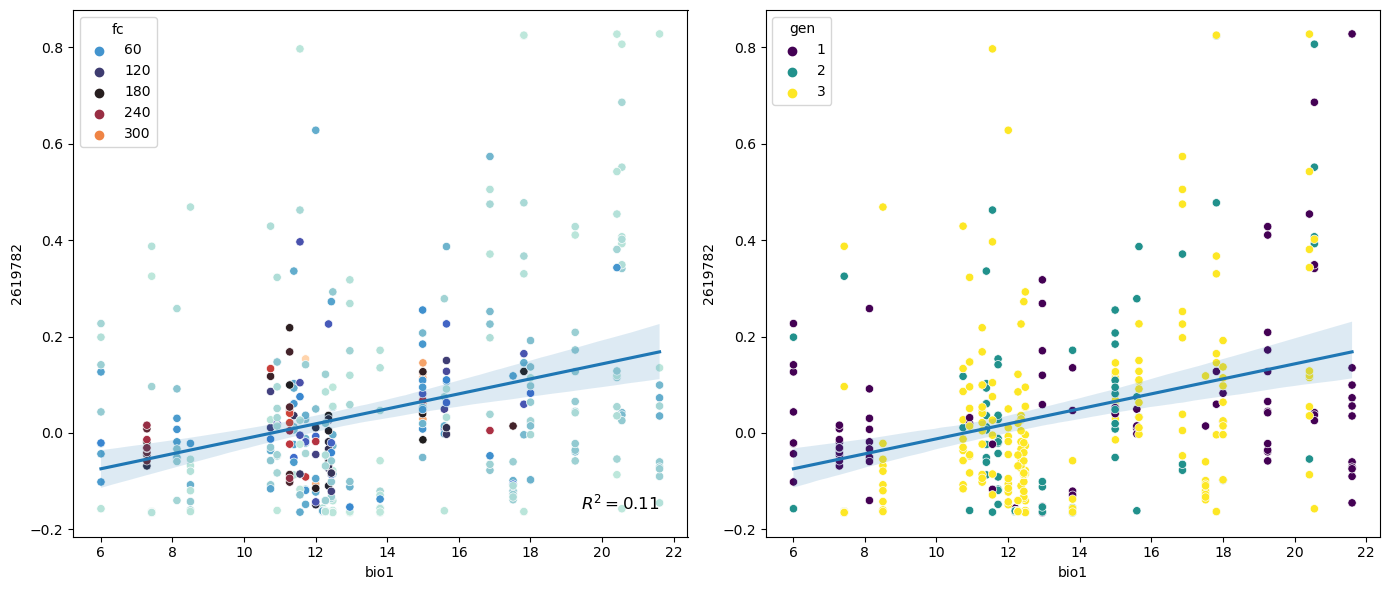

Coefficient for SNP 2350982: [-0.02386024]


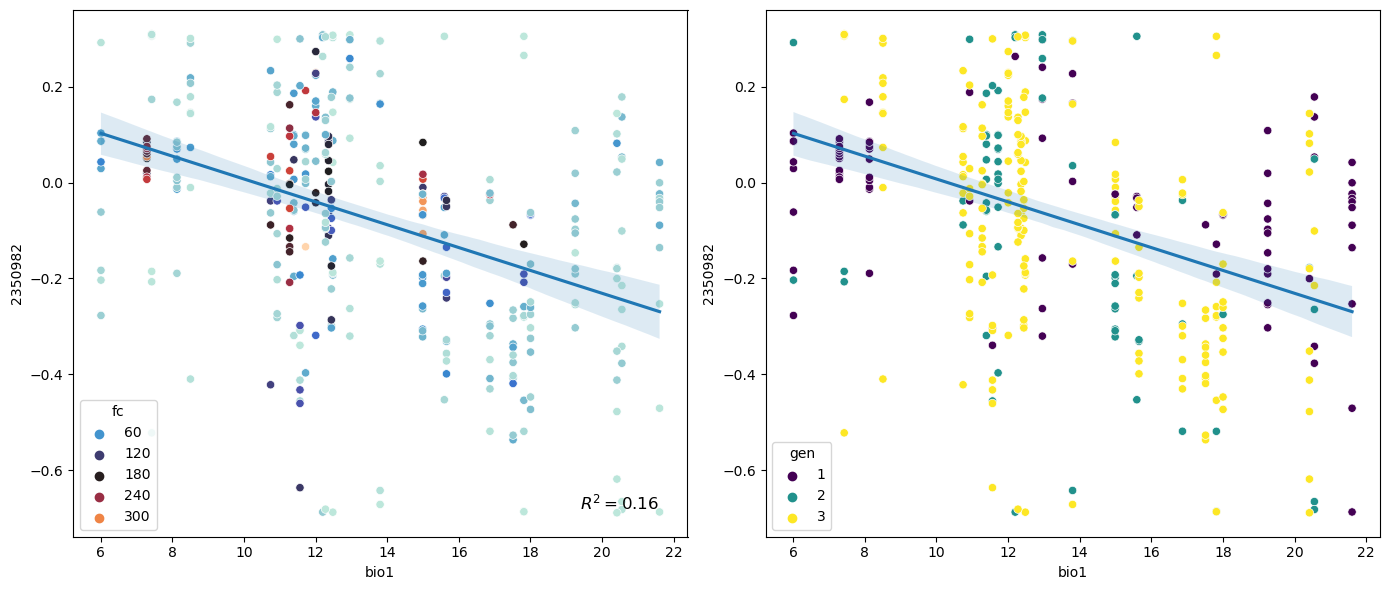

Coefficient for SNP 1131905: [-0.0180154]


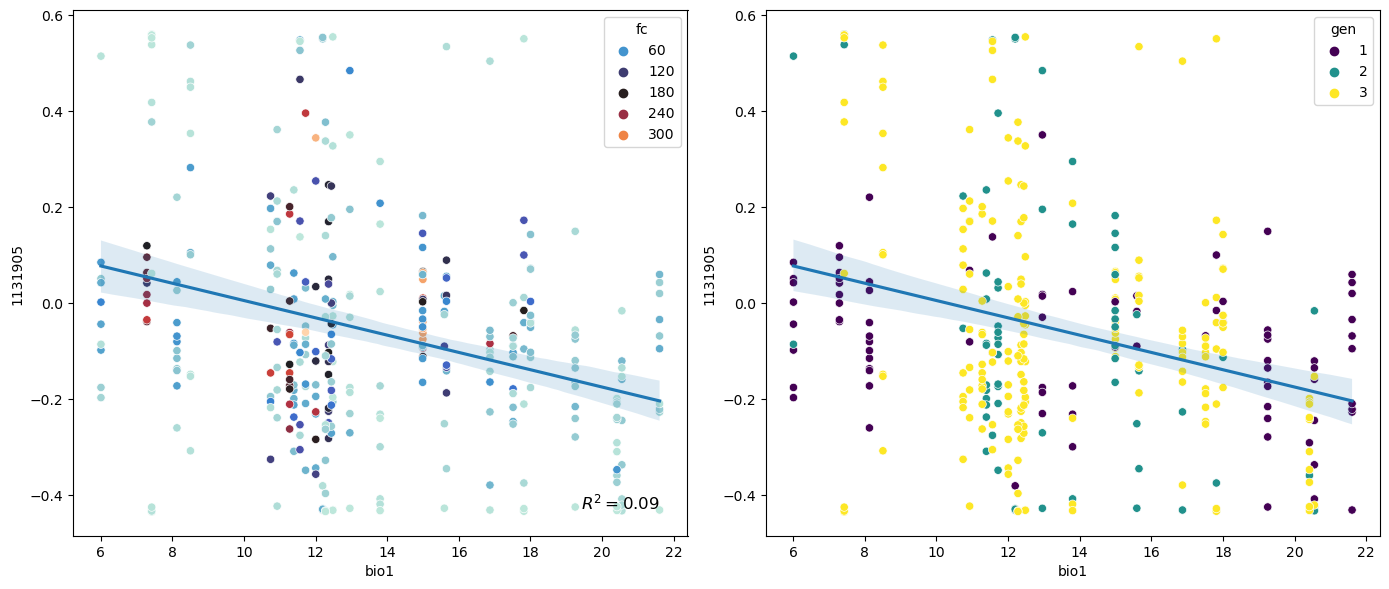

Coefficient for SNP 1783721: [0.00656202]


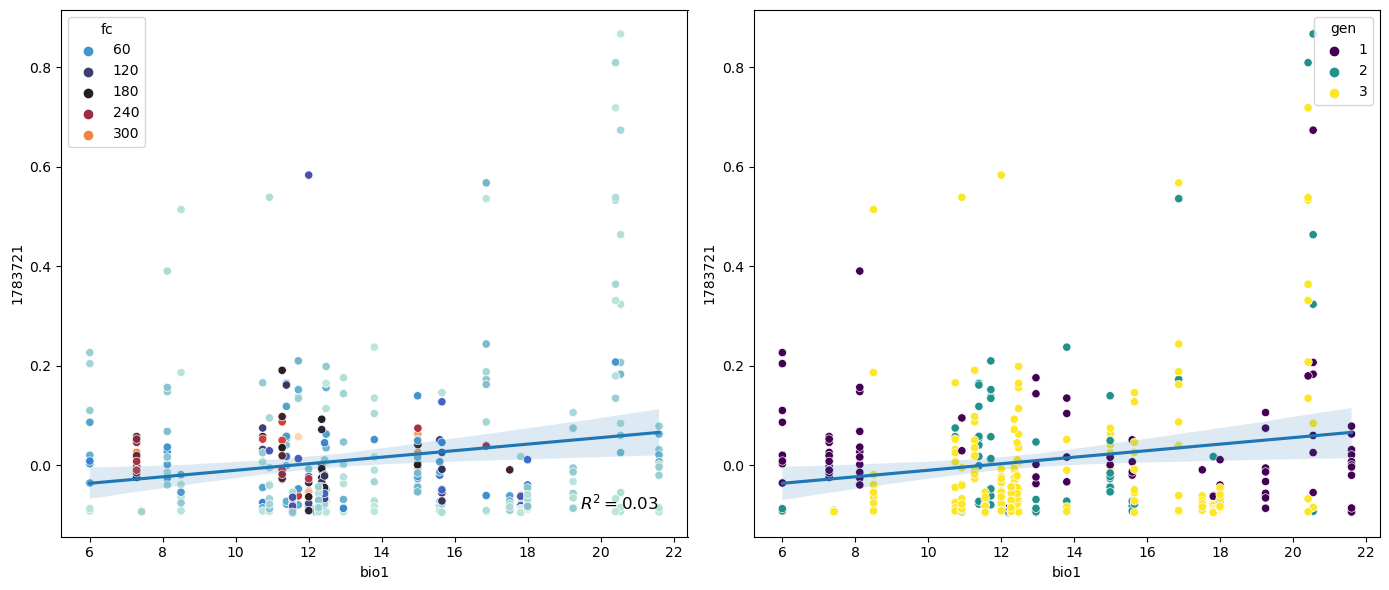

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load your data
# Assuming delta_p_ldpt is already loaded and formatted correctly

# List of SNP indices to plot
snp_indices = ['3234167', '2619782', '2350982', '1131905', '1783721']  # example indices

for snp_index in snp_indices:
    # Set up a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # First subplot with hue based on 'fc'
    sns.scatterplot(ax=axs[0], x='bio1', y=snp_index, data=delta_p_ldpt, hue='fc', palette='icefire', legend=True)
    sns.regplot(ax=axs[0], data=delta_p_ldpt, x='bio1', y=snp_index, scatter=False)

    # Second subplot with hue based on 'gen'
    sns.scatterplot(ax=axs[1], x='bio1', y=snp_index, data=delta_p_ldpt, hue='gen', palette='viridis', legend=True)
    sns.regplot(ax=axs[1], data=delta_p_ldpt, x='bio1', y=snp_index, scatter=False)

    # Fit the linear model
    X = delta_p_ldpt['bio1'].values.reshape(-1, 1)  # Independent variable
    y = delta_p_ldpt[snp_index].values # Dependent variable
    model = LinearRegression().fit(X, y)
    r_squared = model.score(X, y)

    # Display R² on the first plot
    axs[0].text(x=max(delta_p_ldpt['bio1']), y=min(delta_p_ldpt[snp_index]), 
                s=f'$R^2 = {r_squared:.2f}$', color='black', fontsize=12,
                verticalalignment='bottom', horizontalalignment='right')

    # Print the coefficient
    print(f"Coefficient for SNP {snp_index}:", model.coef_)

    # Show the plots
    plt.tight_layout()
    plt.show()



In [199]:
for_m  = delta_p_ldpt[['site', 'bio1', 'fc', 'gen']].groupby(['site', 'bio1'])[['fc', 'gen']].mean().reset_index()

In [200]:
delta_pt_mean = delta_pt_mean.merge(for_m)

In [210]:
new_col_names_var = [str(i) + '_var' for i in delta_pt_std.columns]

In [211]:
delta_pt_std.columns = new_col_names_var

In [213]:
delta_pt_mean = delta_pt_mean.merge(delta_pt_std, right_on = 'site_var', left_on = 'site')

In [215]:
snp_index + '_var'

'1783721_var'

Coefficient for SNP 3234167: [0.00295176]


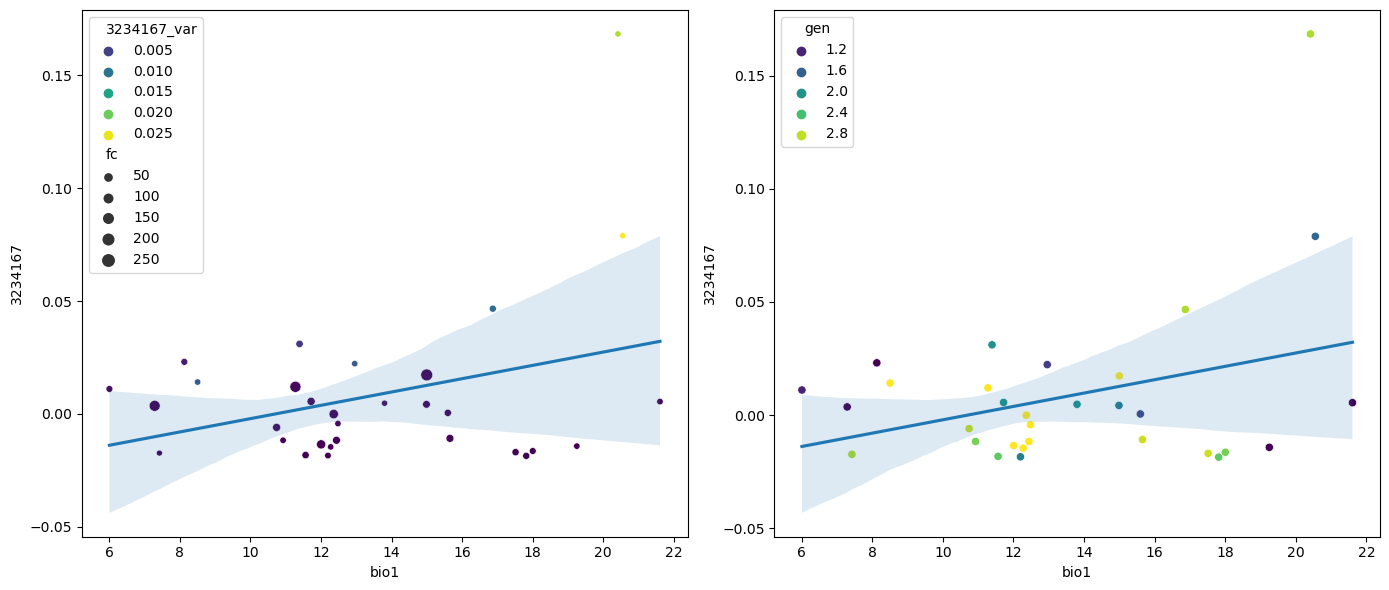

Coefficient for SNP 2619782: [0.01529467]


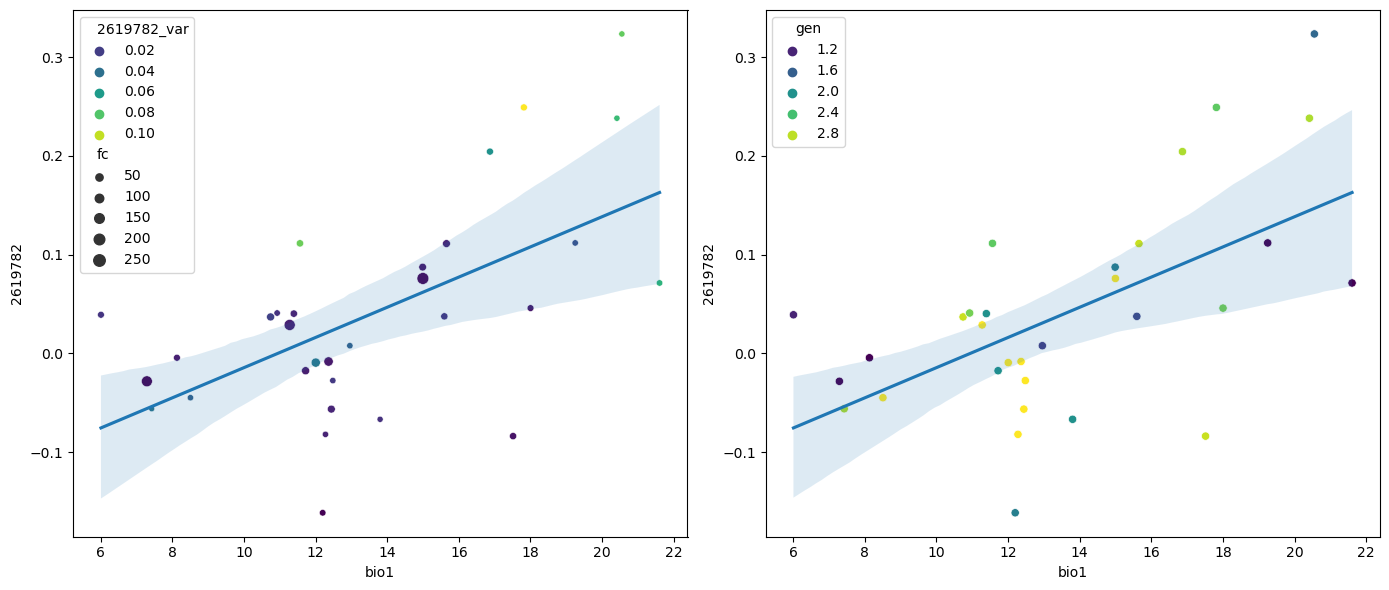

Coefficient for SNP 2350982: [-0.02370753]


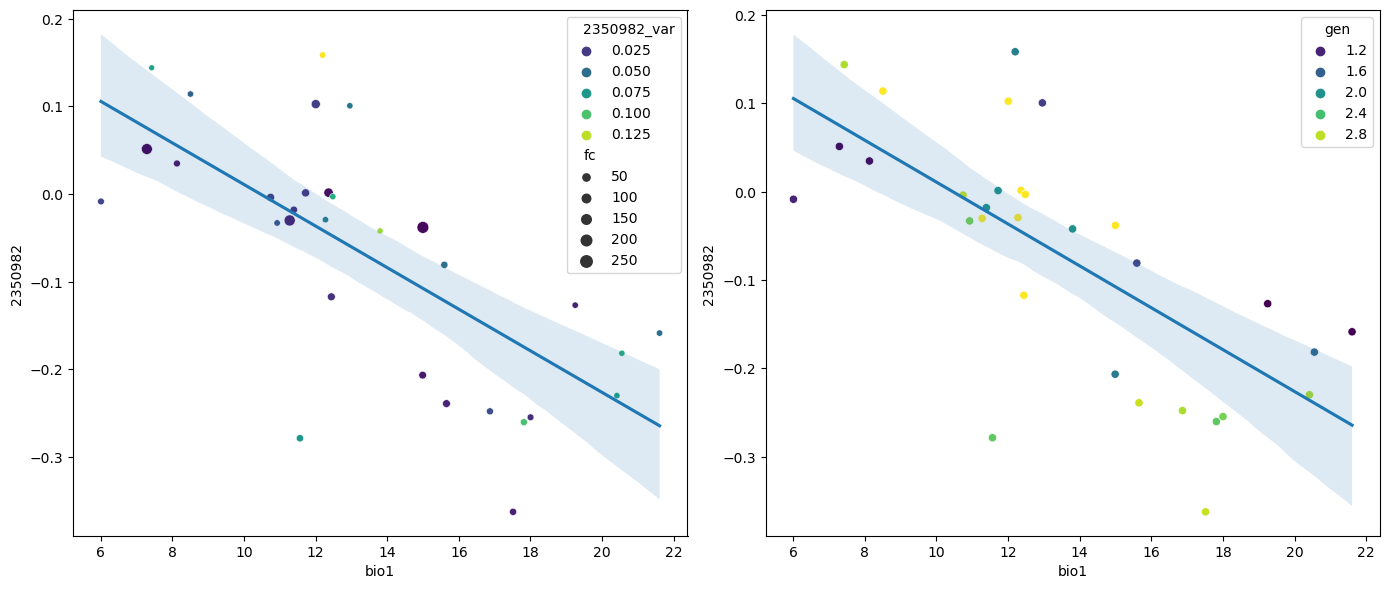

Coefficient for SNP 1131905: [-0.01804512]


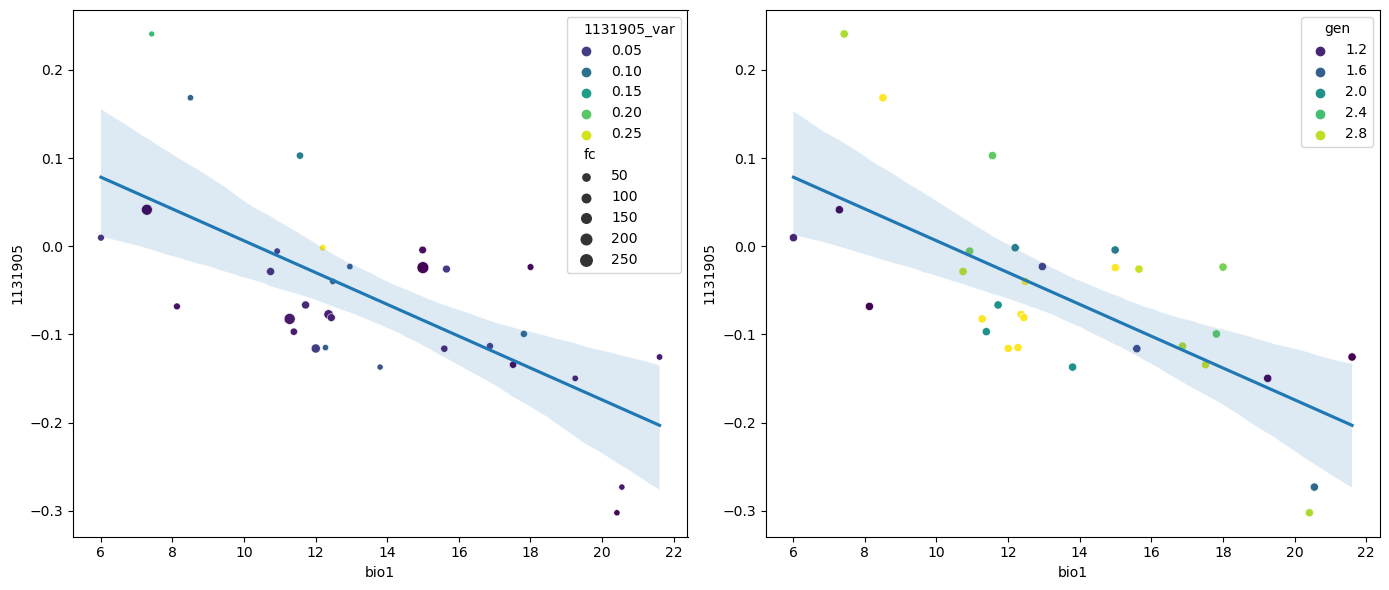

Coefficient for SNP 1783721: [0.00619942]


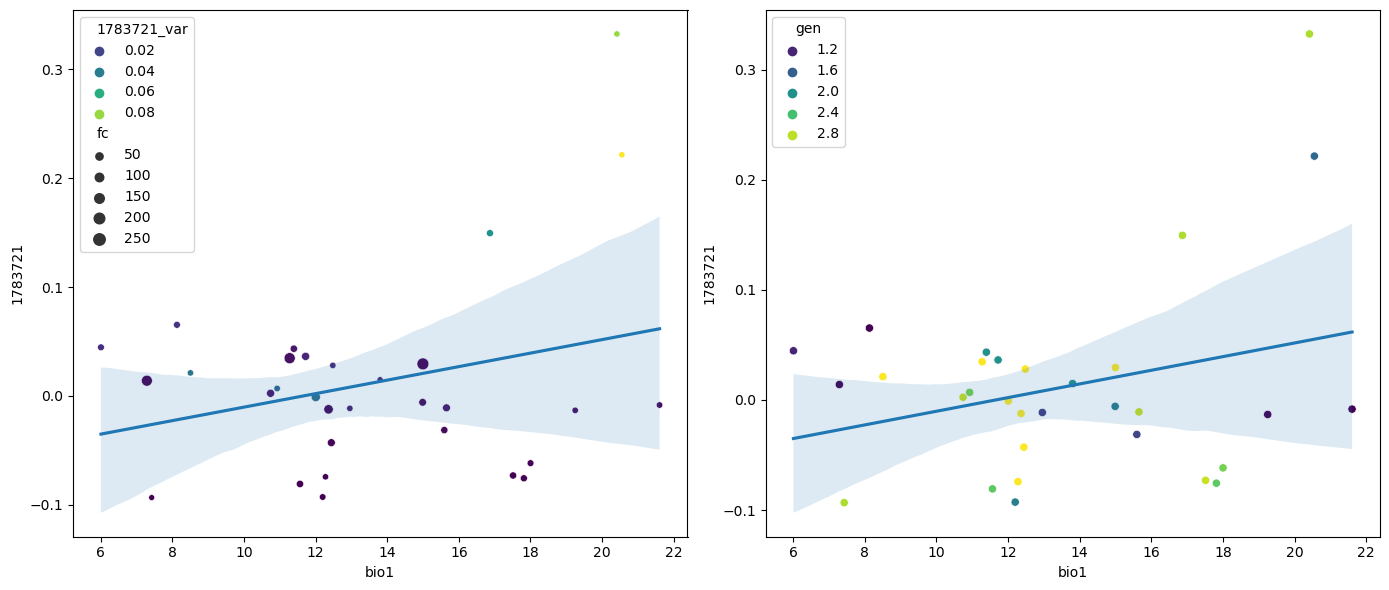

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load your data
# Assuming delta_p_ldpt is already loaded and formatted correctly

# List of SNP indices to plot
snp_indices = ['3234167', '2619782', '2350982', '1131905', '1783721']  # example indices

for snp_index in snp_indices:
    # Set up a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # First subplot with hue based on 'fc'
    sns.scatterplot(ax=axs[0], x='bio1', y=snp_index, data=delta_pt_mean, hue=snp_index + '_var', palette='viridis', 
                    legend=True, size = 'fc')
    sns.regplot(ax=axs[0], data=delta_pt_mean, x='bio1', y=snp_index, scatter=False)

    # Second subplot with hue based on 'gen'
    sns.scatterplot(ax=axs[1], x='bio1', y=snp_index, data=delta_pt_mean, hue='gen', palette='viridis', legend=True)
    sns.regplot(ax=axs[1], data=delta_pt_mean, x='bio1', y=snp_index, scatter=False)

    # Fit the linear model
    X = delta_pt_mean['bio1'].values.reshape(-1, 1)  # Independent variable
    y = delta_pt_mean[snp_index].values # Dependent variable
    model = LinearRegression().fit(X, y)
    r_squared = model.score(X, y)

    # Display R² on the first plot
    #axs[0].text(x=max(delta_p_ldpt['bio1']), y=min(delta_p_ldpt[snp_index]), 
    #            s=f'$R^2 = {r_squared:.2f}$', color='black', fontsize=12,
    #            verticalalignment='bottom', horizontalalignment='right')

    # Print the coefficient
    print(f"Coefficient for SNP {snp_index}:", model.coef_)

    # Show the plots
    plt.tight_layout()
    plt.show()



[0.00457558]


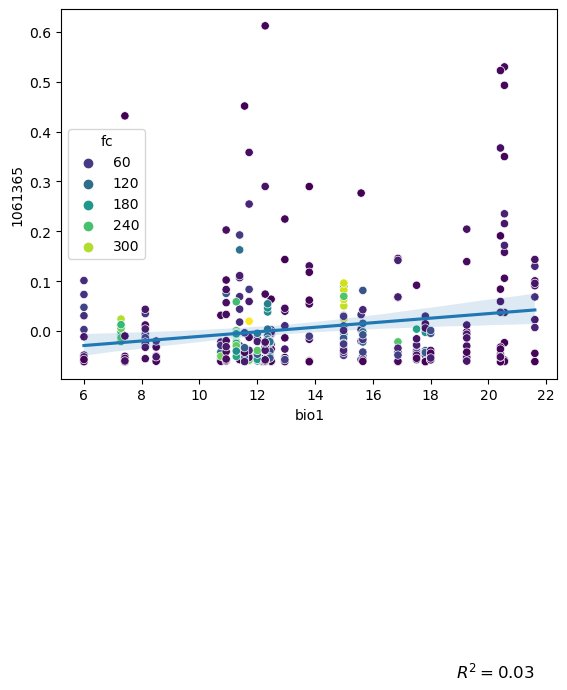

In [158]:
sns.scatterplot(x='bio1', y=1061365, data=delta_p_ldpt, hue='fc', palette='viridis', legend=True)
sns.regplot( data=delta_p_ldpt, x='bio1', y=delta_p_ldpt[1061365], scatter=False)

## model 
X = delta_p_ldpt['bio1'].values.reshape(-1, 1)  # Independent variable
y = delta_p_ldpt[1061365].values # Dependent variable

# Fit the linear model
model = LinearRegression().fit(X, y)

r_squared = model.score(X, y)

# Display R² on the plot
plt.text(x=max(delta_p_ldpt['bio1']), y=-0.7, s=f'$R^2 = {r_squared:.2f}$', 
         color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
print(model.coef_)

#plt.ylim(-0.75, 0.75);

In [412]:
delta_pt_std_plot = delta_pt_std.set_index('site').drop('bio1',axis=1).T

In [413]:
melted_data = delta_pt_std_plot.melt(var_name='site', value_name='std')

In [414]:
order = melted_data.groupby('site')['std'].mean().sort_values().index

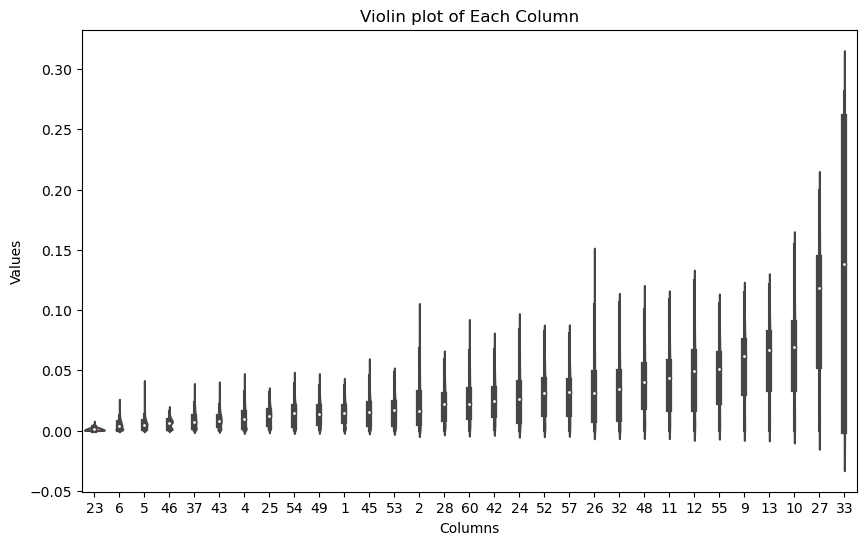

In [415]:
# Plotting the distribution of SNP sharing
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='site', y='std', data=melted_data, order=order)

# Adding titles and labels
plt.title('Violin plot of Each Column')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

In [416]:
melted_data.groupby('site')['std'].max().sort_values()

site
23    0.007548
46    0.018986
6     0.025026
25    0.033546
37    0.037429
43    0.038925
5     0.040510
1     0.041078
49    0.044870
4     0.045015
54    0.046044
53    0.048832
45    0.056812
28    0.062533
42    0.076833
52    0.082507
57    0.082955
60    0.087675
24    0.091607
2     0.100547
55    0.106187
32    0.107186
11    0.109202
48    0.113871
9     0.114963
13    0.121591
12    0.125109
26    0.144609
10    0.154807
27    0.199490
33    0.281867
Name: std, dtype: float64

In [279]:
site_33 = delta_p_ldpt[delta_p_ldpt['site'] == '33']

In [280]:
site_33

,0,1,2,3,4,5,6,7,8,9,...,13978,13979,13980,13981,13982,13983,13984,site,sample,bio1
393,-0.061874,-0.411427,-0.063980,-0.456952,-0.438111,-0.035621,-0.048782,-0.403162,-0.454424,-0.481075,...,-0.118830,-0.072787,-0.425614,-0.104333,-0.087265,-0.060572,-0.046106,33,33_1_1,12.198703
394,-0.069930,-0.464591,-0.065043,-0.493897,-0.488258,-0.054774,-0.057494,-0.457007,0.484316,-0.523694,...,-0.128117,-0.069113,0.520367,-0.114083,-0.089622,-0.063111,-0.047793,33,33_2_4,12.198703
395,-0.069930,0.523094,-0.066787,0.495553,-0.489613,-0.055452,-0.058278,0.531139,0.485310,0.465351,...,-0.128410,-0.075148,-0.471984,-0.114190,-0.094866,-0.062656,-0.050176,33,33_2_5,12.198703
396,-0.069673,0.525949,-0.067538,-0.491331,0.494976,-0.056071,-0.058509,-0.457448,-0.505212,-0.521058,...,-0.128315,-0.074533,0.521362,-0.112695,-0.093692,-0.062775,0.940655,33,33_2_6,12.198703
397,-0.069930,-0.462478,-0.064586,-0.492509,-0.487601,-0.054730,-0.057810,-0.455383,0.483082,-0.523315,...,-0.128649,-0.069873,0.519004,-0.113454,-0.090655,-0.063242,-0.047219,33,33_2_9,12.198703
398,-0.069930,-0.464604,-0.065266,-0.494208,-0.487650,-0.054468,-0.057710,-0.455466,0.484799,-0.523911,...,-0.127828,-0.069826,0.520887,-0.113955,-0.090585,-0.062669,-0.047262,33,33_2_11,12.198703
399,-0.068838,-0.457706,-0.065848,-0.485681,-0.486590,-0.055309,-0.056964,-0.452834,-0.492566,-0.511575,...,-0.127948,-0.076101,-0.472966,-0.114190,-0.093877,-0.062943,-0.050320,33,33_2_12,12.198703


Text(0, 0.5, '33_1_1')

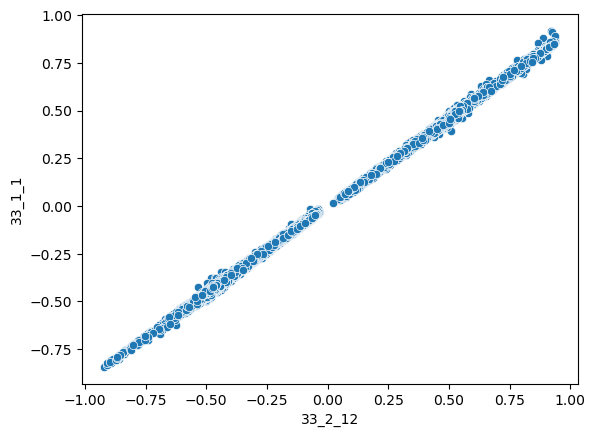

In [288]:
site33_sc = site_33.loc[[399,393] , :].T

site33_sc = site33_sc.iloc[:-3, :]

sns.scatterplot(data = site33_sc, x = 399, y = 393)
plt.xlabel('33_2_12')
plt.ylabel('33_1_1')

Text(0, 0.5, '33_1_1')

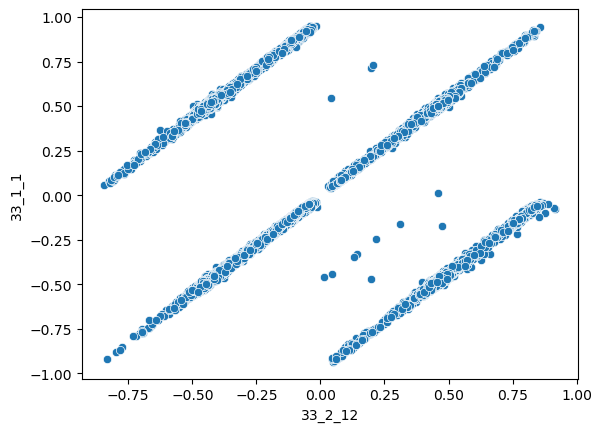

In [290]:
site33_sc = site_33.loc[[393,394] , :].T

site33_sc = site33_sc.iloc[:-3, :]

sns.scatterplot(data = site33_sc, x = 393, y = 394)
plt.xlabel('33_2_12')
plt.ylabel('33_1_1')

In [298]:
site_33e = site_33.set_index('sample').T.iloc[:-2, :]

In [300]:
site_33e

sample,33_1_1,33_2_4,33_2_5,33_2_6,33_2_9,33_2_11,33_2_12
0,-0.061874,-0.06993,-0.06993,-0.069673,-0.06993,-0.06993,-0.068838
1,-0.411427,-0.464591,0.523094,0.525949,-0.462478,-0.464604,-0.457706
2,-0.06398,-0.065043,-0.066787,-0.067538,-0.064586,-0.065266,-0.065848
3,-0.456952,-0.493897,0.495553,-0.491331,-0.492509,-0.494208,-0.485681
4,-0.438111,-0.488258,-0.489613,0.494976,-0.487601,-0.48765,-0.48659
...,...,...,...,...,...,...,...
13980,-0.425614,0.520367,-0.471984,0.521362,0.519004,0.520887,-0.472966
13981,-0.104333,-0.114083,-0.11419,-0.112695,-0.113454,-0.113955,-0.11419
13982,-0.087265,-0.089622,-0.094866,-0.093692,-0.090655,-0.090585,-0.093877
13983,-0.060572,-0.063111,-0.062656,-0.062775,-0.063242,-0.062669,-0.062943


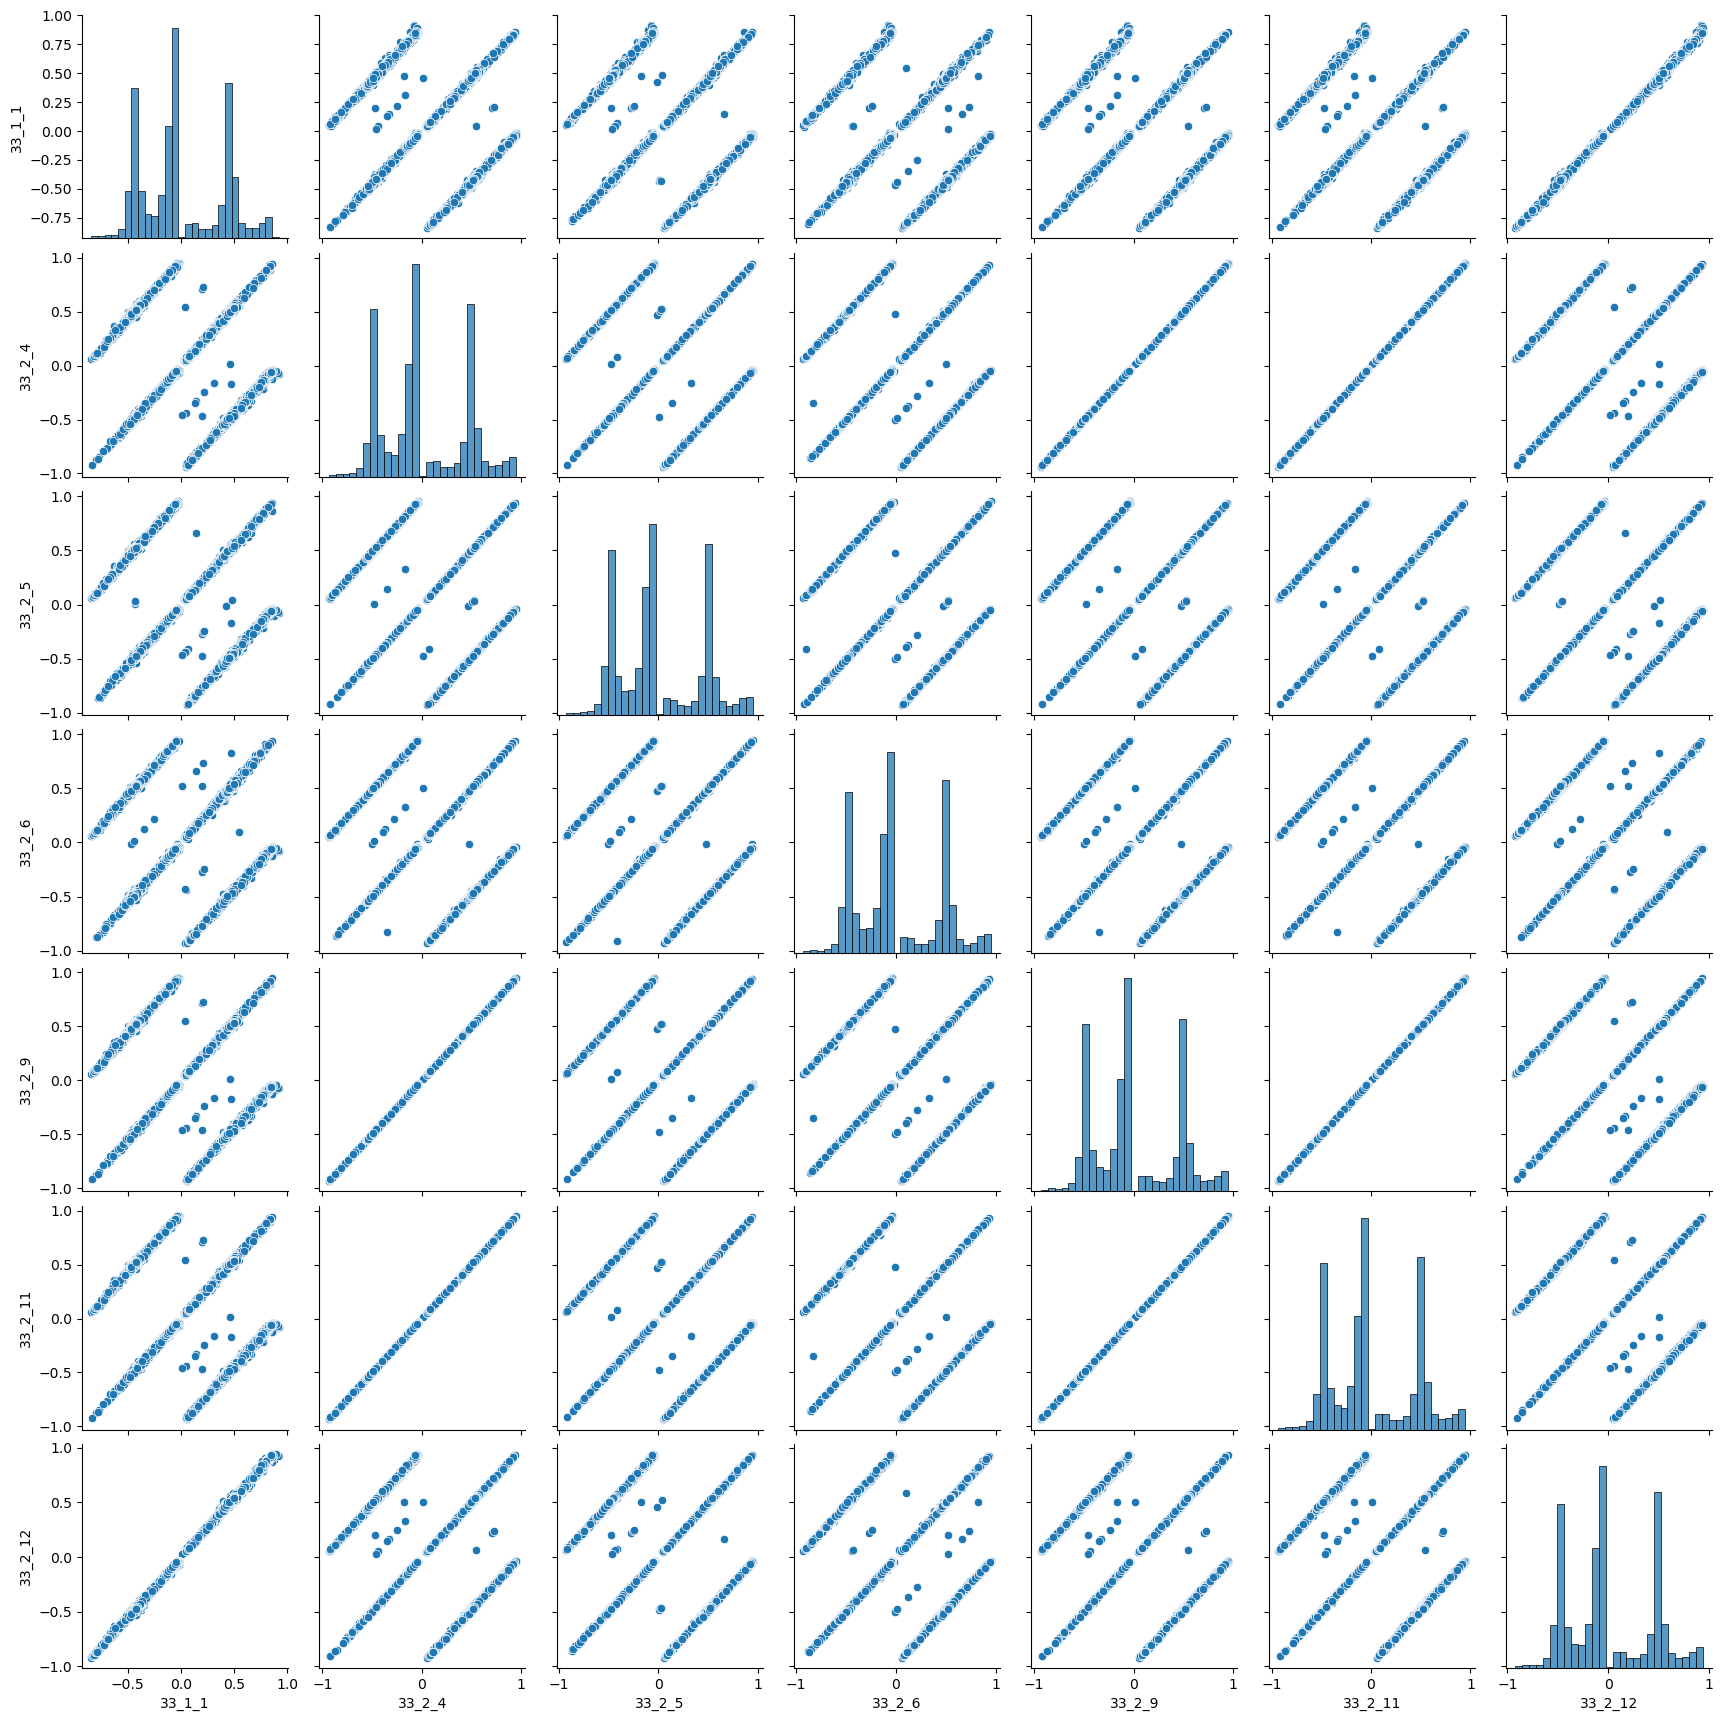

In [299]:
sns.pairplot(site_33e)

In [201]:
site_33 = site_33.iloc[:,:-2]

In [202]:
# Melting the DataFrame
melted_site_33 = site_33.melt(var_name='snp', value_name='freq', ignore_index=False)
melted_site_33['sample'] = melted_site_33.index

In [216]:
sampled_snps = np.random.choice(melted_site_33['snp'].unique(), size=20, replace=False)

In [217]:
melted_site_331 = melted_site_33[melted_site_33['snp'].isin(sampled_snps)]

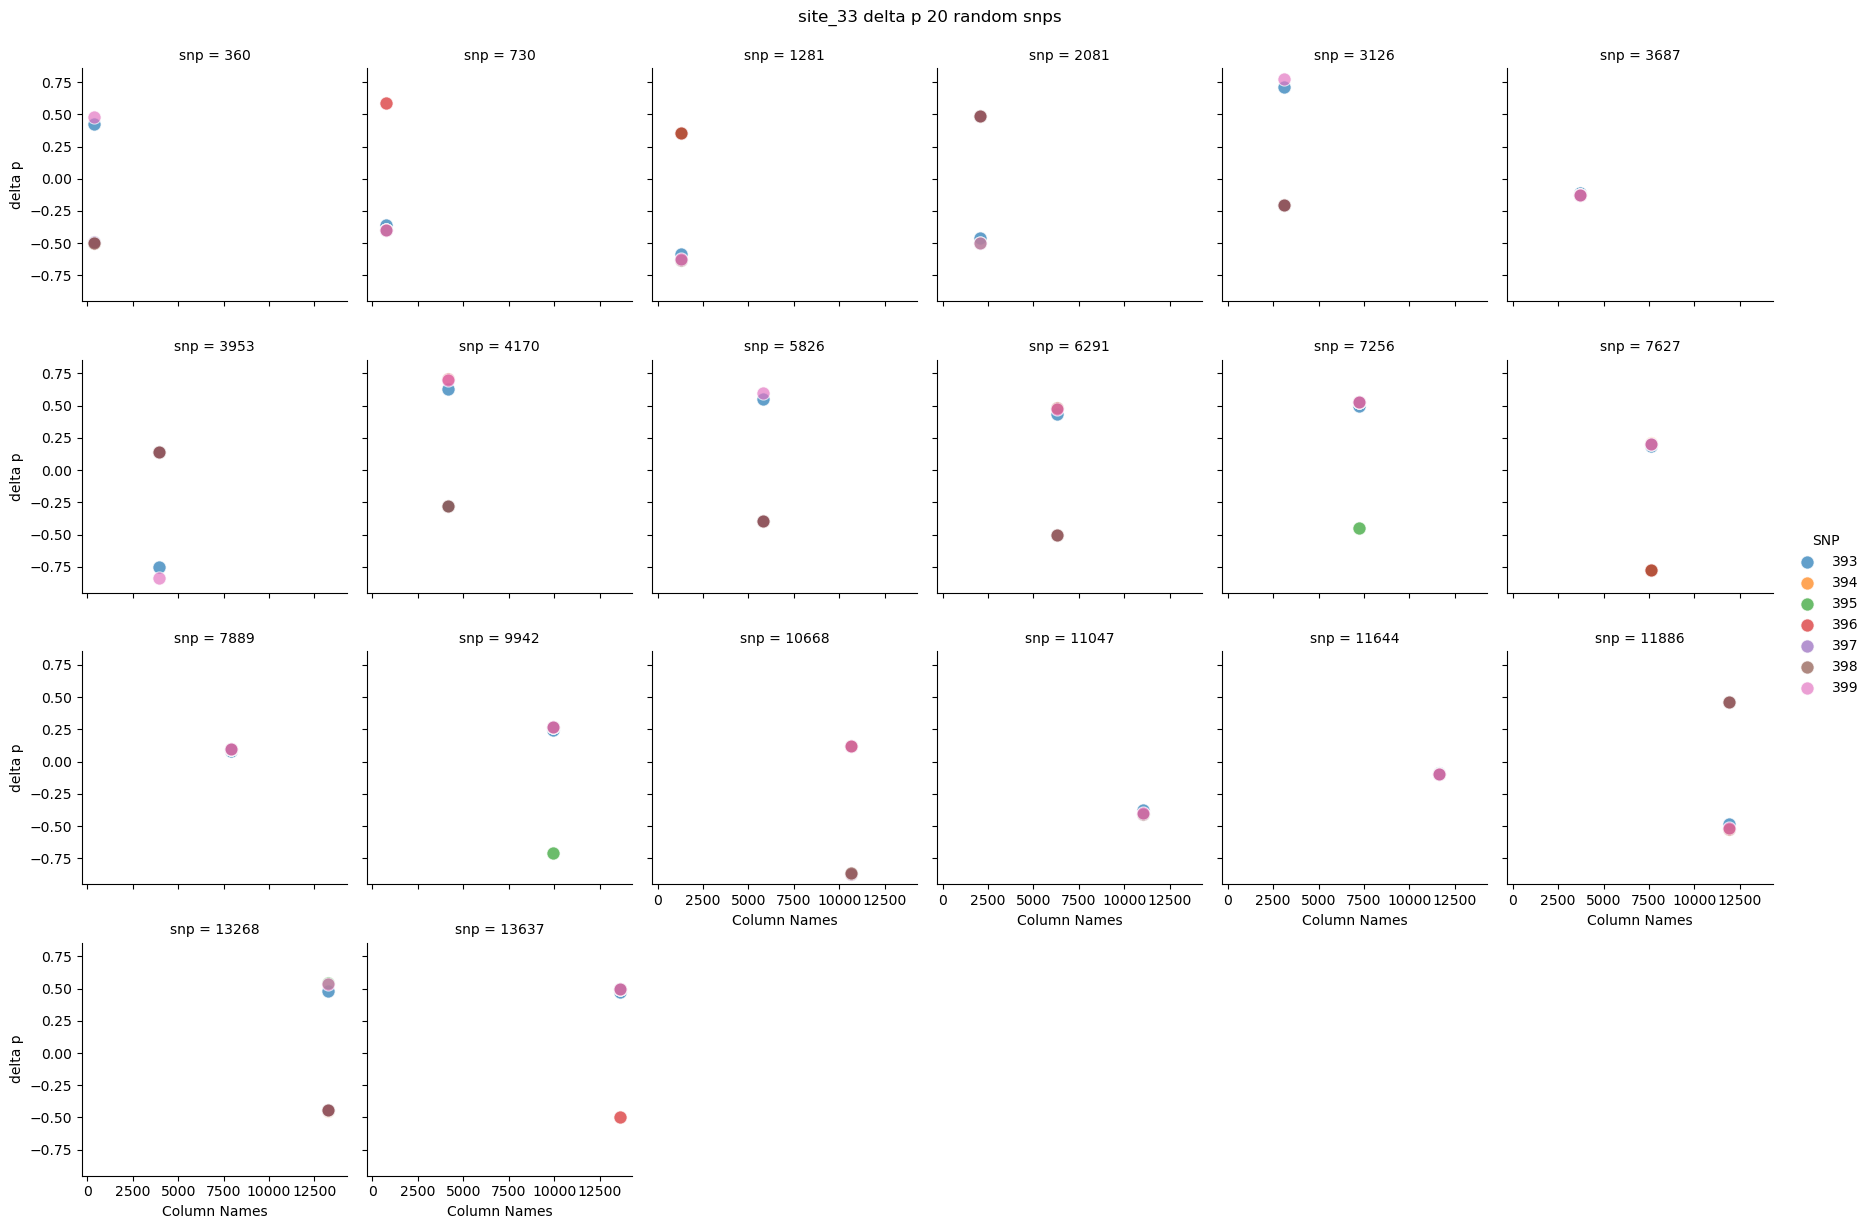

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a FacetGrid with the DataFrame, specifying columns based on 'snp' values
# This creates a separate subplot for each unique 'snp'
g = sns.FacetGrid(melted_site_331, col='snp', col_wrap=6, height=3, hue = 'sample')
g.map_dataframe(sns.scatterplot, x='snp', y='freq', s=90, alpha = 0.7)

# Adding titles and labels
g.fig.suptitle('site_33 delta p 20 random snps', y=1.02)  # Adjust title position
g.set_axis_labels('Column Names', 'delta p')
g.add_legend(title='SNP')
# Show the plot
plt.show()



In [333]:
delta_pt_std_values = delta_pt_std.set_index('site').drop('bio1',axis=1)

In [340]:
delta_pt_std_values = delta_pt_std_values.melt(var_name='snp', value_name='freq', ignore_index=False).reset_index()

In [356]:
len(delta_pt_std_values[delta_pt_std_values['freq'] > 0.1]) * 100 / len(delta_pt_std_values)

4.470688641055509

In [355]:
len(delta_pt_std_values[delta_pt_std_values['freq'] <= 0.1]) * 100 / len(delta_pt_std_values)

95.5293113589445

In [ ]:
### delta_p mean

In [ ]:
final_gen = pd.read_csv('../final_gen.csv')['sample_name'].values

delta_p = delta_p[final_gen]

In [17]:
sites = delta_p.columns.str.split('_').str[0]

In [18]:
unique_sites = sites.unique()

In [38]:
delta_p

,1_2_2,1_2_3,1_3_1,1_3_4,1_3_5,1_3_6,1_3_7,1_3_8,1_3_9,1_3_10,...,60_1_3,60_1_4,60_1_5,60_1_6,60_1_7,60_1_8,60_1_9,60_1_10,60_1_11,60_1_12
0,-0.028818,0.036460,-0.035929,-0.006479,0.044934,-0.035238,-0.029945,-0.012693,0.002560,-0.035599,...,0.057666,-0.028029,-0.000572,-0.035332,-0.034154,-0.004419,0.010854,0.099501,0.144855,0.070575
1,0.077353,0.063114,0.482707,0.352325,0.084993,0.114956,-0.172746,0.273725,-0.165205,-0.068810,...,0.003421,-0.047405,0.159179,0.139286,0.182493,-0.031104,0.394335,-0.024800,0.214351,0.331971
2,-0.008149,-0.008358,-0.009927,-0.009950,-0.008056,-0.009690,-0.009545,0.085582,-0.008818,-0.010104,...,-0.009023,-0.009060,-0.009787,-0.009670,-0.009463,-0.005424,-0.006426,-0.008581,-0.009954,-0.009736
3,0.092697,0.017205,0.104870,-0.019930,-0.013602,0.054909,-0.017604,0.060181,-0.016739,-0.018750,...,0.001576,-0.017788,-0.018627,-0.018692,0.007252,-0.011011,-0.016851,-0.016568,-0.018801,-0.016824
4,-0.013608,-0.047198,-0.061547,-0.066422,0.110707,0.054597,-0.059608,0.030963,0.052962,-0.065326,...,-0.025259,0.105829,-0.040566,-0.064403,-0.050163,0.067992,-0.051357,-0.058157,0.018033,-0.054994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235475,-0.001398,0.023201,-0.012367,-0.010260,-0.009483,-0.011095,-0.010345,-0.011973,-0.008209,-0.012561,...,-0.010384,-0.011946,0.012094,-0.012351,0.177506,-0.010117,-0.008048,-0.010340,-0.011016,-0.008852
3235476,-0.012300,-0.014138,-0.015520,-0.016091,-0.012855,-0.014785,-0.011450,-0.014705,0.021832,-0.015633,...,-0.008200,0.005838,-0.015847,-0.014900,-0.015546,-0.010254,-0.015996,-0.014803,-0.014180,-0.014193
3235477,-0.004097,-0.004088,-0.004548,-0.004589,-0.002224,-0.004589,-0.004218,-0.004271,-0.003541,-0.004589,...,-0.002531,-0.004077,0.022955,-0.004032,-0.003019,-0.000182,-0.004589,-0.004000,-0.004236,-0.004371
3235478,0.087579,-0.018166,0.371977,-0.051750,0.261620,0.062609,-0.007007,0.357164,0.191729,-0.008890,...,0.284793,-0.105910,0.076569,-0.229307,0.039052,0.339761,-0.098738,-0.046880,0.140612,-0.056359


In [39]:
delta_p_t = delta_p.T

In [40]:
delta_p_t = delta_p_t.reset_index()

In [41]:
delta_p_t['index'] = delta_p_t['index'].str.split('_').str[0]

In [42]:
delta_p_t

,index,0,1,2,3,4,5,6,7,8,...,3235470,3235471,3235472,3235473,3235474,3235475,3235476,3235477,3235478,3235479
0,1,-0.028818,0.077353,-0.008149,0.092697,-0.013608,0.035854,-0.040804,-0.040804,-0.040568,...,0.059144,-0.009641,0.059144,-0.012034,-0.004992,-0.001398,-0.012300,-0.004097,0.087579,0.095324
1,1,0.036460,0.063114,-0.008358,0.017205,-0.047198,-0.036898,0.024012,0.024012,0.004652,...,-0.047508,-0.011242,-0.047508,-0.014865,-0.004947,0.023201,-0.014138,-0.004088,-0.018166,0.075635
2,1,-0.035929,0.482707,-0.009927,0.104870,-0.061547,-0.025147,-0.049962,-0.049962,-0.044355,...,0.049558,-0.015168,0.049558,-0.017110,-0.004992,-0.012367,-0.015520,-0.004548,0.371977,-0.044204
3,1,-0.006479,0.352325,-0.009950,-0.019930,-0.066422,-0.085462,-0.020077,-0.020077,-0.043240,...,-0.074859,0.073117,-0.074859,-0.017334,-0.004934,-0.010260,-0.016091,-0.004589,-0.051750,-0.123522
4,1,0.044934,0.084993,-0.008056,-0.013602,0.110707,0.037411,0.033954,0.033954,-0.000581,...,0.153813,-0.011583,0.153813,-0.015540,-0.004927,-0.009483,-0.012855,-0.002224,0.261620,-0.060145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,60,-0.004419,-0.031104,-0.005424,-0.011011,0.067992,0.139095,0.084227,0.084227,-0.040906,...,-0.018248,-0.008531,-0.018248,-0.010778,-0.004992,-0.010117,-0.010254,-0.000182,0.339761,-0.103489
351,60,0.010854,0.394335,-0.006426,-0.016851,-0.051357,-0.076162,-0.000432,-0.000432,-0.030410,...,-0.068484,-0.009535,-0.068484,-0.015630,-0.004781,-0.008048,-0.015996,-0.004589,-0.098738,0.135461
352,60,0.099501,-0.024800,-0.008581,-0.016568,-0.058157,-0.066051,0.141513,0.141513,0.140909,...,0.016816,0.110003,0.016816,-0.015151,-0.004992,-0.010340,-0.014803,-0.004000,-0.046880,0.100939
353,60,0.144855,0.214351,-0.009954,-0.018801,0.018033,0.008938,0.131201,0.131201,-0.015514,...,0.015570,0.053276,0.015570,0.017766,-0.004213,-0.011016,-0.014180,-0.004236,0.140612,-0.070362


In [43]:
delta_p_t_mean = delta_p_t.groupby('index')[delta_p_t.columns[1:]].mean()

In [44]:
delta_p_t_mean =delta_p_t_mean.T

In [45]:
delta_p_t_mean

index,1,10,11,12,13,2,23,24,25,26,...,49,5,52,53,54,55,57,6,60,9
0,-0.012963,-0.030743,-0.032927,-0.021296,-0.024088,-0.024172,0.001794,-0.030060,-0.022089,0.075581,...,-0.023505,0.006490,-0.022614,-0.023238,0.016090,0.173468,-0.023821,0.151981,0.031107,-0.012184
1,0.106286,0.065364,-0.057154,0.114146,0.068807,0.150697,-0.015940,0.010951,0.071908,0.020395,...,-0.032457,0.015091,0.041636,0.106911,-0.081148,-0.090429,-0.075870,-0.017645,0.153485,-0.112818
2,-0.001183,0.067674,0.001137,0.000921,0.017257,0.006277,-0.002903,0.000802,0.024607,0.000288,...,-0.000167,-0.005027,-0.007945,0.000977,-0.005339,-0.009517,-0.006273,0.015879,-0.008878,-0.004291
3,0.021131,-0.018302,0.086583,-0.005039,-0.017516,-0.007260,0.000654,-0.003442,0.020116,-0.004861,...,0.018414,0.001537,0.019127,0.011364,0.086891,-0.015634,0.010452,-0.012769,-0.013698,0.065165
4,-0.013498,-0.011391,0.048779,0.026160,0.066380,-0.024118,0.000600,0.000673,0.010320,0.012622,...,-0.001592,0.006560,0.002483,0.006324,0.125167,0.008185,0.039594,0.020276,-0.023364,-0.041825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235475,-0.007152,-0.011959,-0.010799,-0.008806,-0.011834,-0.006771,-0.002943,0.005902,-0.010514,-0.004624,...,-0.003036,-0.008917,0.035858,-0.000510,-0.010424,-0.010189,-0.012043,-0.007570,0.006904,-0.011554
3235476,-0.011078,-0.011112,-0.014561,-0.015002,-0.015386,-0.012777,-0.005350,-0.007350,-0.014942,-0.009501,...,-0.014013,-0.011543,-0.012105,-0.003675,-0.007674,-0.008717,-0.011124,-0.005503,-0.012347,-0.014066
3235477,-0.003987,0.002515,0.002116,-0.004300,-0.004172,-0.002955,-0.000891,-0.000260,-0.003749,-0.003093,...,-0.003500,-0.000726,-0.004338,-0.002556,-0.003423,-0.003703,0.005443,-0.001746,-0.001384,-0.003795
3235478,0.120097,0.084511,0.073314,-0.023916,0.050557,0.056859,-0.032479,0.119262,0.045648,0.111101,...,0.145674,0.056141,0.002221,-0.002566,0.137406,-0.041895,0.106285,0.035118,0.067166,0.091998


In [36]:
delta_p_t_mean.to_csv('delta_p_mean.csv',index=None)

In [383]:
sites = delta_p.columns.str.split('_').str[0]

In [384]:
unique_sites = sites.unique()

In [385]:
unique_sites

Index(['1', '2', '4', '5', '6', '9', '10', '11', '12', '13', '23', '24', '25',
       '26', '27', '28', '32', '33', '37', '42', '43', '45', '46', '48', '49',
       '52', '53', '54', '55', '57', '60'],
      dtype='object')

In [387]:
site = 1

In [388]:
site_columns = [i for i in delta_p.columns if i.startswith(f'{site}_')]

In [398]:
# Iterate over each site
for site in unique_sites:
    # Get all columns for the current site
    site_columns = [i for i in delta_p.columns if i.startswith(f'{site}_')]
    
    # Calculate the standard deviation for each SNP across the current site's samples
    std_devs = delta_p[site_columns].std(axis=1)
    
    # Find SNPs where the standard deviation exceeds 0.2
    high_std_snps = std_devs > 0.2
    
    # Replace these SNP values with NaN for this site
    delta_p.loc[high_std_snps, site_columns] = pd.NA


In [404]:
delta_p.isna().sum().drop_duplicates()

1_2_2     214144
2_1_8     220431
4_1_4       6262
5_3_1          0
6_1_1         40
9_3_1     587762
10_1_3    555422
11_1_4    553470
12_1_2    636715
13_1_6    499510
24_1_1    223105
25_2_1     14568
26_1_1    293607
27_2_2    863517
28_2_7    233653
32_1_5    498926
33_1_1    701971
37_1_1         4
42_1_2    212696
43_1_3      4631
45_2_3     93402
46_3_1       184
48_3_1    539718
49_2_1     90438
52_3_1    439463
53_3_1       203
54_3_1      9322
55_1_7    685177
57_3_1    508001
60_1_1     81066
dtype: int64

In [407]:
delta_p

,1_2_2,1_2_3,1_3_1,1_3_4,1_3_5,1_3_6,1_3_7,1_3_8,1_3_9,1_3_10,...,60_1_3,60_1_4,60_1_5,60_1_6,60_1_7,60_1_8,60_1_9,60_1_10,60_1_11,60_1_12
0,-0.028818,0.036460,-0.035929,-0.006479,0.044934,-0.035238,-0.029945,-0.012693,0.002560,-0.035599,...,0.057666,-0.028029,-0.000572,-0.035332,-0.034154,-0.004419,0.010854,0.099501,0.144855,0.070575
1,0.077353,0.063114,0.482707,0.352325,0.084993,0.114956,-0.172746,0.273725,-0.165205,-0.068810,...,0.003421,-0.047405,0.159179,0.139286,0.182493,-0.031104,0.394335,-0.024800,0.214351,0.331971
2,-0.008149,-0.008358,-0.009927,-0.009950,-0.008056,-0.009690,-0.009545,0.085582,-0.008818,-0.010104,...,-0.009023,-0.009060,-0.009787,-0.009670,-0.009463,-0.005424,-0.006426,-0.008581,-0.009954,-0.009736
3,0.092697,0.017205,0.104870,-0.019930,-0.013602,0.054909,-0.017604,0.060181,-0.016739,-0.018750,...,0.001576,-0.017788,-0.018627,-0.018692,0.007252,-0.011011,-0.016851,-0.016568,-0.018801,-0.016824
4,-0.013608,-0.047198,-0.061547,-0.066422,0.110707,0.054597,-0.059608,0.030963,0.052962,-0.065326,...,-0.025259,0.105829,-0.040566,-0.064403,-0.050163,0.067992,-0.051357,-0.058157,0.018033,-0.054994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235475,-0.001398,0.023201,-0.012367,-0.010260,-0.009483,-0.011095,-0.010345,-0.011973,-0.008209,-0.012561,...,-0.010384,-0.011946,0.012094,-0.012351,0.177506,-0.010117,-0.008048,-0.010340,-0.011016,-0.008852
3235476,-0.012300,-0.014138,-0.015520,-0.016091,-0.012855,-0.014785,-0.011450,-0.014705,0.021832,-0.015633,...,-0.008200,0.005838,-0.015847,-0.014900,-0.015546,-0.010254,-0.015996,-0.014803,-0.014180,-0.014193
3235477,-0.004097,-0.004088,-0.004548,-0.004589,-0.002224,-0.004589,-0.004218,-0.004271,-0.003541,-0.004589,...,-0.002531,-0.004077,0.022955,-0.004032,-0.003019,-0.000182,-0.004589,-0.004000,-0.004236,-0.004371
3235478,0.087579,-0.018166,0.371977,-0.051750,0.261620,0.062609,-0.007007,0.357164,0.191729,-0.008890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
#delta_p.to_csv('delta_p_filt.csv',index=None)

In [ ]:
97587448

In [399]:
es[es == 0.0960950267776514]

1991070    0.096095
Name: V1, dtype: float64

In [404]:
es.loc[1991070]

0.0960950267776514

In [ ]:
0.096095

In [398]:
es.max()

0.0960950267776514

<Axes: xlabel='V1', ylabel='Count'>

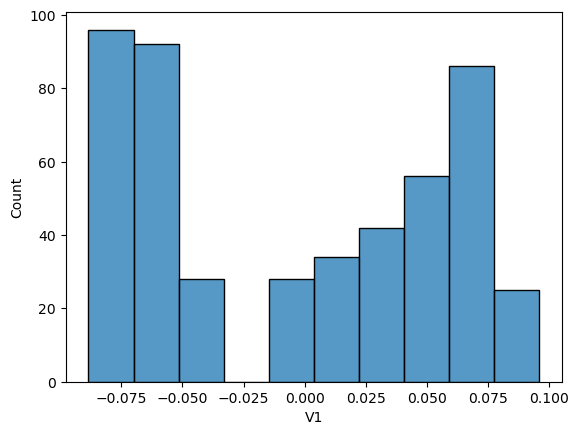

In [393]:
sns.histplot(es)

In [ ]:
clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')

clim_sites_during_exp['site'] = clim_sites_during_exp['site'].astype(str)

In [ ]:
train_env = clim_sites_during_exp[clim_sites_during_exp['site'].isin(pd.Series(train_samples).str.split('_').str[0].unique())][['site','bio1']]

In [ ]:
test_env = clim_sites_during_exp[clim_sites_during_exp['site'].isin(pd.Series(test_samples).str.split('_').str[0].unique())][['site','bio1']]

array(['1', '4', '5', '6', '9', '10', '13', '23', '24', '25', '26', '27',
       '28', '32', '42', '43', '45', '46', '49', '52', '53', '54', '55',
       '57', '60'], dtype=object)

In [ ]:
    sites_af = pd.Series(train_samples).str.split('_').str[0].astype(int)
    
    sites_af.name = 'site'
    
    env = sites_af.reset_index().merge(clim_sites_during_exp).drop(['index'],axis=1)
    
    ## for now only work with bio1 and bio12 
    env = env[['site', 'bio1', 'bio12']]
    
    mean_bio1 = np.mean(env['bio1'])
    mean_bio12 = np.mean(env['bio12'])
    std_bio1 = np.std(env['bio1'])
    std_bio12 = np.std(env['bio12'])
    
    ## for the testing
    
    sites_af = pd.Series(test_samples).str.split('_').str[0].astype(int)
    sites_af.name = 'site'
    env = sites_af.reset_index().merge(clim_sites_during_exp).drop(['index'],axis=1)
    env = env[['site', 'bio1', 'bio12']]

In [9]:
input_clumping_f = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/input_clumping.txt'


In [11]:
pd.read_csv(input_clumping_f,sep = ' ')

,SNP,P
0,1_64304,0.0001
1,1_79802,0.0001
2,1_85817,0.0001
3,1_194098,0.0001
4,1_194356,0.0001
...,...,...
2891,5_26914547,0.0001
2892,5_26917798,0.0001
2893,5_26918679,0.0001
2894,5_26920125,0.0001


In [13]:
(675 * 100) / 2896

23.308011049723756

In [17]:
(487 * 100) / 2896

16.816298342541437

In [77]:
split_number 

1

In [78]:
env_train_f = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/environment_lea_full_genome.csv'
env_train = pd.read_csv(env_train_f)

In [79]:
env_train

,bio1,bio12
0,-0.772069,0.090004
1,-0.772069,0.090004
2,-0.772069,0.090004
3,-0.772069,0.090004
4,-0.772069,0.090004
...,...,...
292,1.288658,-0.993046
293,1.288658,-0.993046
294,1.288658,-0.993046
295,1.288658,-0.993046


In [14]:
for split_number in [1]:
    predicted_delta_p_bio1_file = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/predicted_allele_freq_bio1.csv'
    snps_indices_bio1_file = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/snps_indices_bio1.csv'
    clumping_file = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/output_clumping02.clumped'
    dict_rpos_index0_file = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/dict_rpos_index0.pkl'
    number_snps_file = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/num_nps_sel.txt' 
    output_file_af = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/r2_pred_allele_freq.csv' 
    output_file_ef = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/r2_pred_ecotype_freq.csv' 
    output_file_efpredr2 = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/r2fit_pred_ecotype_freq.csv' 
    output_file_sp = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/noinfspcorr_pred_ecotype_freq.csv' 
    
    #split1 
    train_samples = splits_samples[split_number][0]
    test_samples = splits_samples[split_number][1]
    
    predicted_delta_p_bio1 = pd.read_csv(predicted_delta_p_bio1_file).drop('Unnamed: 0',axis=1)

    snps_indices_bio1_old = pd.read_csv(snps_indices_bio1_file)


    if len(snps_indices_bio1_old) == 0:
        print(f'No snps split {split_number}')
    else:  
        
        ## load the dictionary with the index0 and real snp id
        with open(dict_rpos_index0_file, 'rb') as file:
            dict_rpos_index0 = pickle.load(file)
    
        # load the result of clumping
        clumping = pd.read_csv(clumping_file, delim_whitespace=True)
        # use the dictionary to get a column with the index of the clumped snps 
        clumping['index0'] = clumping['SNP'].replace(dict_rpos_index0)
        
        snps_0index = clumping['index0']
        snps_0index = snps_0index.to_list()

        nsnps = len(snps_0index)
        print(nsnps)
        with open(number_snps_file, 'w') as file:
            file.write(str(nsnps))

        #genotype_counts_filt = genotype_counts.iloc[snps_0index, :]
        
        ## retrieving the old index to filter the allele freq prediciton
        snps_1index = np.array(snps_0index) + 1
        
        snps_indices_bio1_old = snps_indices_bio1_old[snps_indices_bio1_old['x'].isin(snps_1index)]
        
        predicted_delta_p_bio1.columns = predicted_delta_p_bio1.columns.str.replace('V','').astype(int)
        
        snps_indices_bio1_old.columns = ['old_index1short', 'snps_indices_bio1_old_full']
        
        predicted_delta_p_bio1 = predicted_delta_p_bio1[snps_indices_bio1_old['old_index1short']]
            
        ## delta_p train 
        delta_p_train = delta_p[train_samples]
        #delta_p_mean = delta_p_train.mean(axis=1)
        #mean_af_sel = delta_p_mean.iloc[snps_0index,]
        
        ## allele freq test
        delta_p_test = delta_p[test_samples]
        
        delta_p_sel = delta_p_test.iloc[snps_0index,:]
        
        delta_p_sel = delta_p_sel.sort_index()
        
        ## subract the mean to see what i get 
        #predicted_delta_p_bio1 = predicted_delta_p_bio1.sub(mean_af_sel.values,axis=1)
        
        predicted_delta_p_bio1t = predicted_delta_p_bio1.T
        
        predicted_delta_p_bio1t.columns = delta_p_sel.columns

        


487


In [68]:
delta_p_ts = delta_p[train_samples]

In [71]:
delta_p_ts = delta_p_ts.loc[snps_0index]

In [384]:
delta_p_ts

,1_2_2,1_2_3,1_3_1,1_3_4,1_3_5,1_3_6,1_3_7,1_3_8,1_3_9,1_3_10,...,60_1_3,60_1_4,60_1_5,60_1_6,60_1_7,60_1_8,60_1_9,60_1_10,60_1_11,60_1_12
1268,-0.018869,0.121137,0.524633,0.464511,0.046101,0.054668,-0.085987,-0.094543,-0.085617,-0.095372,...,-0.008695,-0.094322,-0.066149,-0.060602,-0.063976,-0.064202,0.090577,0.026067,-0.094043,0.183707
7799,0.045717,-0.047715,0.272019,-0.159709,0.005799,0.113685,0.181732,0.102528,0.091204,0.345478,...,-0.100920,0.133905,0.067393,0.138549,-0.049762,-0.211710,-0.092681,0.032224,-0.333719,-0.039903
12824,-0.010437,0.082257,-0.153787,0.124265,-0.004584,-0.147249,-0.139798,-0.168405,-0.017160,-0.036302,...,0.104885,-0.137242,-0.093235,0.183584,-0.007221,-0.088943,-0.076234,0.229733,-0.033177,0.006138
17502,-0.084383,-0.196600,0.310331,-0.203305,0.014927,-0.294285,0.346458,0.205553,-0.066648,-0.429602,...,0.124886,0.008164,0.278643,-0.157714,-0.037155,0.083268,0.146000,0.104073,0.224299,0.147880
18855,-0.025729,0.129012,-0.071489,-0.071192,-0.045664,-0.069935,-0.058820,-0.010768,-0.037969,-0.072333,...,-0.048991,-0.071701,-0.046437,-0.069195,0.127468,-0.063085,0.060841,-0.068209,-0.072126,-0.064714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218200,-0.162015,-0.138189,-0.282726,-0.299596,-0.133117,-0.284765,-0.207619,-0.156127,-0.132779,-0.285835,...,0.069276,0.157518,0.229434,-0.022927,0.122579,-0.040996,-0.259761,-0.085792,-0.210974,-0.108115
3221018,-0.020032,-0.022500,-0.026439,-0.026598,-0.023980,-0.026570,-0.025801,0.070436,-0.023432,-0.026598,...,-0.021036,0.007276,-0.025964,-0.025739,-0.023720,-0.017586,-0.021264,-0.020897,-0.026273,-0.026491
3229973,0.000851,0.159139,-0.272031,0.337260,-0.093733,-0.067835,-0.312376,0.339603,-0.310968,-0.525051,...,-0.283274,-0.032904,0.006574,0.200789,0.073753,-0.079311,0.034082,-0.015804,-0.236485,-0.111985
3233731,-0.033950,-0.038714,-0.066434,-0.055329,0.133224,-0.082683,-0.067992,0.171997,-0.047994,-0.087994,...,-0.041537,-0.040873,-0.007956,0.468946,-0.068897,0.014824,0.298651,0.170219,0.260891,-0.079454


In [269]:
delta_p_tests = delta_p[test_samples]

In [270]:
delta_p_tests = delta_p_tests.loc[snps_0index]

In [271]:
delta_p_tests

,2_1_8,2_1_9,2_1_11,2_1_12,2_2_5,2_2_6,2_2_7,11_1_4,11_1_8,11_1_9,...,48_3_1,48_3_2,48_3_3,48_3_4,48_3_6,48_3_8,48_3_9,48_3_10,48_3_11,48_3_12
1268,-0.000750,0.006311,0.028119,-0.051839,-0.090549,-0.096011,0.033769,0.013920,-0.073419,-0.079799,...,-0.093976,-0.057148,-0.021525,-0.094157,-0.093527,0.078124,-0.068920,-0.052862,-0.074706,0.072184
7799,-0.114253,-0.021242,0.059747,0.060112,-0.283036,0.347039,-0.374096,0.072696,-0.353961,-0.310505,...,-0.236468,-0.089170,0.210434,0.339139,-0.317064,0.344984,0.211779,0.208624,-0.167022,0.013272
12824,-0.036833,-0.046985,-0.065898,-0.008305,-0.163873,0.391329,-0.199394,-0.040912,-0.171122,-0.205866,...,-0.232194,-0.034256,-0.188580,0.219364,-0.058954,-0.060426,-0.125333,-0.149514,-0.206662,0.124837
17502,0.063318,0.038943,-0.094431,0.017354,0.148908,-0.434229,0.337460,0.055791,-0.161612,-0.060137,...,-0.157454,-0.148562,0.403276,-0.426331,-0.432513,0.372302,0.267250,-0.276976,0.094973,-0.203804
18855,-0.025342,-0.004058,-0.047327,-0.055386,-0.071157,-0.073026,-0.064161,0.029351,-0.058959,-0.055234,...,-0.072794,-0.032729,-0.057183,-0.072135,0.040916,0.099699,-0.060582,-0.033977,-0.061800,0.219314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218200,0.067611,-0.034475,0.027297,-0.116240,-0.201078,0.048571,-0.272004,0.340700,-0.106910,0.262898,...,0.369516,-0.087479,-0.259908,0.203483,-0.190652,-0.004702,-0.154117,0.244190,0.514518,-0.096542
3221018,-0.003818,-0.014143,0.033884,-0.021374,-0.025294,-0.026391,-0.021162,-0.021711,0.024363,-0.022725,...,-0.025066,-0.016516,-0.022830,-0.025780,-0.025807,-0.026214,-0.017192,-0.013146,-0.020351,-0.019596
3229973,-0.062924,0.083225,0.002334,0.025406,-0.352380,-0.179592,-0.348781,0.043545,-0.358276,-0.049143,...,-0.177613,0.194121,0.095300,-0.286857,-0.337988,-0.047363,-0.416779,0.348435,0.213238,0.098920
3233731,-0.012693,0.041509,0.027305,-0.006888,-0.059744,-0.085754,0.097184,-0.069103,0.079959,-0.059019,...,-0.079122,-0.005388,-0.079101,-0.086475,-0.083295,-0.089189,-0.047479,-0.057280,-0.056591,-0.060446


In [39]:
r2_af = {}
for i in delta_p_sel.columns:
    # Reshape the data to fit the model
    X = delta_p_sel[i].values.reshape(-1, 1)  # Independent variable
    y = predicted_delta_p_bio1t[i].values # Dependent variable

    # Fit the linear model
    model = LinearRegression().fit(X, y)

    # Predict the values
    y_pred = model.predict(X)

    # Calculate R^2
    r_squared = r2_score(y, y_pred)
    r2_af[i] = r_squared

r2_af = pd.DataFrame(list(r2_af.items()), columns=['Index', 'Value'])
r2_af.columns = ['sample', 'r2'] 


In [40]:
r2_af

,sample,r2
0,2_1_8,0.170232
1,2_1_9,0.042210
2,2_1_11,0.005567
3,2_1_12,0.028090
4,2_2_5,0.126529
5,2_2_6,0.087613
6,2_2_7,0.174763
7,11_1_4,0.164342
8,11_1_8,0.268028
9,11_1_9,0.481559


In [36]:
r2_af_d = {}
for i in delta_p_sel.columns:
    # Reshape the data to fit the model
    # Calculate R^2
    r_squared = r2_score(delta_p_sel[i].reset_index(drop=True), predicted_delta_p_bio1t[i].reset_index(drop=True))
    r2_af_d[i] = r_squared

r2_af_d = pd.DataFrame(list(r2_af_d.items()), columns=['Index', 'Value'])
r2_af_d.columns = ['sample', 'r2'] 

In [46]:
delta_p_sel

,2_1_8,2_1_9,2_1_11,2_1_12,2_2_5,2_2_6,2_2_7,11_1_4,11_1_8,11_1_9,...,48_3_1,48_3_2,48_3_3,48_3_4,48_3_6,48_3_8,48_3_9,48_3_10,48_3_11,48_3_12
1268,-0.000750,0.006311,0.028119,-0.051839,-0.090549,-0.096011,0.033769,0.013920,-0.073419,-0.079799,...,-0.093976,-0.057148,-0.021525,-0.094157,-0.093527,0.078124,-0.068920,-0.052862,-0.074706,0.072184
7799,-0.114253,-0.021242,0.059747,0.060112,-0.283036,0.347039,-0.374096,0.072696,-0.353961,-0.310505,...,-0.236468,-0.089170,0.210434,0.339139,-0.317064,0.344984,0.211779,0.208624,-0.167022,0.013272
12824,-0.036833,-0.046985,-0.065898,-0.008305,-0.163873,0.391329,-0.199394,-0.040912,-0.171122,-0.205866,...,-0.232194,-0.034256,-0.188580,0.219364,-0.058954,-0.060426,-0.125333,-0.149514,-0.206662,0.124837
17502,0.063318,0.038943,-0.094431,0.017354,0.148908,-0.434229,0.337460,0.055791,-0.161612,-0.060137,...,-0.157454,-0.148562,0.403276,-0.426331,-0.432513,0.372302,0.267250,-0.276976,0.094973,-0.203804
18855,-0.025342,-0.004058,-0.047327,-0.055386,-0.071157,-0.073026,-0.064161,0.029351,-0.058959,-0.055234,...,-0.072794,-0.032729,-0.057183,-0.072135,0.040916,0.099699,-0.060582,-0.033977,-0.061800,0.219314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218200,0.067611,-0.034475,0.027297,-0.116240,-0.201078,0.048571,-0.272004,0.340700,-0.106910,0.262898,...,0.369516,-0.087479,-0.259908,0.203483,-0.190652,-0.004702,-0.154117,0.244190,0.514518,-0.096542
3221018,-0.003818,-0.014143,0.033884,-0.021374,-0.025294,-0.026391,-0.021162,-0.021711,0.024363,-0.022725,...,-0.025066,-0.016516,-0.022830,-0.025780,-0.025807,-0.026214,-0.017192,-0.013146,-0.020351,-0.019596
3229973,-0.062924,0.083225,0.002334,0.025406,-0.352380,-0.179592,-0.348781,0.043545,-0.358276,-0.049143,...,-0.177613,0.194121,0.095300,-0.286857,-0.337988,-0.047363,-0.416779,0.348435,0.213238,0.098920
3233731,-0.012693,0.041509,0.027305,-0.006888,-0.059744,-0.085754,0.097184,-0.069103,0.079959,-0.059019,...,-0.079122,-0.005388,-0.079101,-0.086475,-0.083295,-0.089189,-0.047479,-0.057280,-0.056591,-0.060446


In [49]:
predicted_delta_p_bio1t.index = snps_0index

In [56]:
r2_af_snps = {}
for i in delta_p_sel.index:
    # Reshape the data to fit the model
    # Calculate R^2
    r_squared = r2_score(delta_p_sel.loc[i,:], predicted_delta_p_bio1t.loc[i,:])
    r2_af_snps[i] = r_squared

r2_af_snps = pd.DataFrame(list(r2_af_snps.items()), columns=['Index', 'Value'])
r2_af_snps.columns = ['snp', 'r2'] 

<Axes: ylabel='Count'>

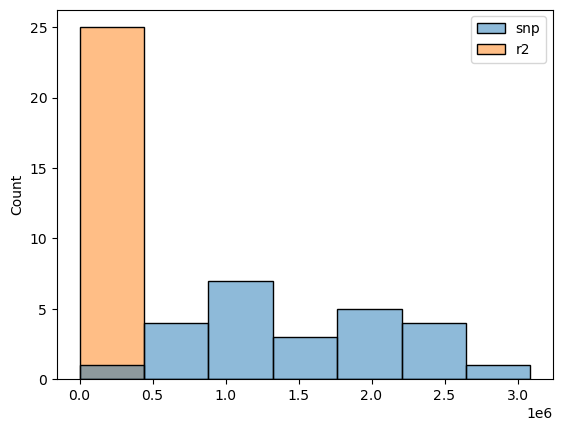

In [61]:
sns.histplot(r2_af_snps[r2_af_snps['r2']>0] )

In [390]:
r2_af_snps

,snp,r2
0,1268,-0.078922
1,7799,-0.091459
2,12824,-0.138627
3,17502,-0.066910
4,18855,-0.116855
...,...,...
482,3218200,-0.134169
483,3221018,-0.413207
484,3229973,-0.051105
485,3233731,-0.410670


In [ ]:
delta_p_ts.columns = 

In [81]:
env_train['bio1']

0     -0.772069
1     -0.772069
2     -0.772069
3     -0.772069
4     -0.772069
         ...   
292    1.288658
293    1.288658
294    1.288658
295    1.288658
296    1.288658
Name: bio1, Length: 297, dtype: float64

In [84]:
X = env_train['bio1'].values.reshape(-1, 1)  # Independent variable
y = delta_p_ts.loc[2256647,:].values # Dependent variable

# Fit the linear model
model = LinearRegression().fit(X, y)

In [90]:
model.

LinearRegression()

In [89]:
model.coef_

array([0.09934259])

In [144]:
delta_p_tests

delta_p_tests_MEAN = delta_p_tests.T

delta_p_tests_MEAN['site'] = delta_p_tests_MEAN.index.str.split('_').str[0]

#delta_p_tests_MEAN = delta_p_tests_MEAN.groupby('site')[delta_p_tests_MEAN.columns[:-1]].median()

In [148]:
delta_p_tests_MEAN = delta_p_tests_MEAN.set_index('site')

In [141]:
test_env = test_env.set_index('site')

In [154]:
test_env.reset_index()

,site,bio1
0,11,13.801396
1,12,12.957162
2,2,15.594627
3,33,12.198703
4,37,8.130012
5,48,8.506768


In [156]:
testing = delta_p_tests_MEAN[2256647].reset_index().merge(test_env.reset_index())

In [401]:
sns.scatterplot(x = testing['bio1'], y = testing[1991070])

KeyError: 1991070

In [ ]:
train_env = train_env.set_index('site')

In [405]:
delta_p_ts_MEAN[1991070]

site
1     0.160784
10    0.220376
13    0.256128
23    0.046278
24    0.178595
25    0.154121
26    0.186935
27    0.332339
28    0.222920
32    0.258003
4     0.128963
42    0.147399
43    0.163315
45    0.168279
46    0.133163
49    0.225502
5     0.042912
52    0.220627
53    0.086124
54    0.146503
55    0.342435
57    0.206541
6     0.101112
60    0.223393
9     0.245551
Name: 1991070, dtype: float64

(-0.75, 0.75)

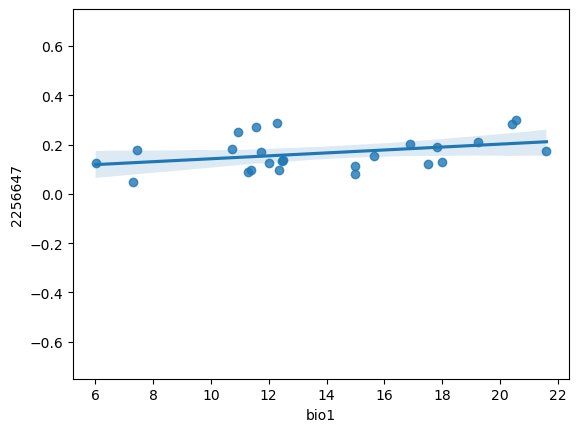

In [402]:
delta_p_ts_MEAN = delta_p_ts.T

delta_p_ts_MEAN['site'] = delta_p_ts_MEAN.index.str.split('_').str[0]

delta_p_ts_MEAN = delta_p_ts_MEAN.groupby('site')[delta_p_ts_MEAN.columns[:-1]].std()

training = delta_p_ts_MEAN[2256647].reset_index().merge(train_env.reset_index())

sns.regplot(x = train_env['bio1'], y = delta_p_ts_MEAN[2256647])
plt.ylim(-0.75, 0.75)

(-0.75, 0.75)

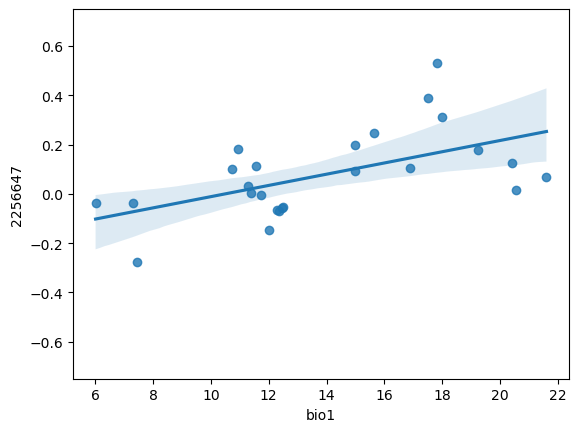

In [202]:
delta_p_ts_MEAN = delta_p_ts.T

delta_p_ts_MEAN['site'] = delta_p_ts_MEAN.index.str.split('_').str[0]

delta_p_ts_MEAN = delta_p_ts_MEAN.groupby('site')[delta_p_ts_MEAN.columns[:-1]].median()

training = delta_p_ts_MEAN[2256647].reset_index().merge(train_env.reset_index())

sns.regplot(x = train_env['bio1'], y = delta_p_ts_MEAN[2256647])
plt.ylim(-0.75, 0.75)

In [285]:
model.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

[0.02230212]


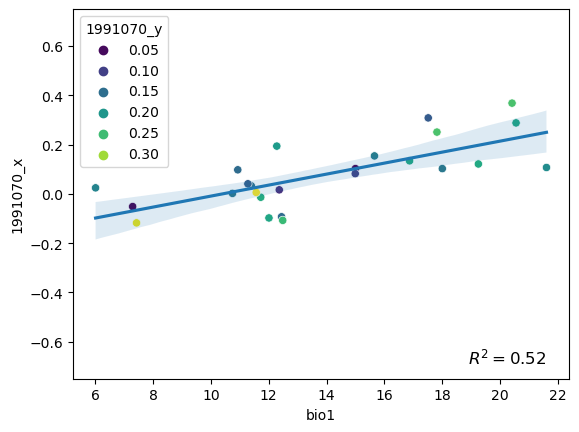

In [406]:
delta_p_ts_MEAN = delta_p_ts.T

delta_p_ts_MEAN['site'] = delta_p_ts_MEAN.index.str.split('_').str[0]

delta_p_ts_std = delta_p_ts_MEAN.groupby('site')[delta_p_ts_MEAN.columns[:-1]].std()

delta_p_ts_MEAN = delta_p_ts_MEAN.groupby('site')[delta_p_ts_MEAN.columns[:-1]].mean()


training = delta_p_ts_MEAN[1991070].reset_index().merge(train_env.reset_index()).merge(delta_p_ts_std.reset_index()[['site', 1991070]], on ='site')

1991070
#sns.regplot(x = train_env['bio1'], y = delta_p_ts_MEAN[1991070], hue = )

sns.scatterplot(x='bio1', y='1991070_x', data=training, hue='1991070_y', palette='viridis', legend=True)
sns.regplot(x='bio1', y='1991070_x', data=training, scatter=False)

## model 
X = training['bio1'].values.reshape(-1, 1)  # Independent variable
y = training['1991070_x'].values # Dependent variable

# Fit the linear model
model = LinearRegression().fit(X, y)

r_squared = model.score(X, y)

# Display R² on the plot
plt.text(x=max(training['bio1']), y=-0.7, s=f'$R^2 = {r_squared:.2f}$', 
         color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
print(model.coef_)

plt.ylim(-0.75, 0.75);

In [388]:
es[2256647]

0.0716989492989223

In [303]:
test_env

,bio1
site,
11,13.801396
12,12.957162
2,15.594627
33,12.198703
37,8.130012
48,8.506768


In [340]:
## sites with a standard deviation lower than 0.2 
std_sites = std[std[2256647] < 0.2 ]['site'].unique()

In [343]:
test_env_filt = test_env.loc[std_sites]

In [344]:
prediction_af = model.predict(test_env_filt)

/home/tbellagio/miniforge3/envs/pipeline_snakemake/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [345]:
prediction_af

array([ 0.05453651, -0.07179436, -0.06193432])

In [346]:
test_env

,bio1
site,
11,13.801396
12,12.957162
2,15.594627
33,12.198703
37,8.130012
48,8.506768


In [348]:
real = delta_p_tests_MEAN[2256647].reset_index()

In [351]:
real = real[real['site'].isin(std_sites)]

In [352]:
real['pred'] = prediction_af

/tmp/ipykernel_1601986/4049339861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['pred'] = prediction_af


In [353]:
real[2256647].values.reshape(-1, 1)

array([[-0.03517643],
       [-0.08402593],
       [-0.11166127]])

In [326]:
real[2256647]

0   -0.022911
1   -0.035176
2    0.121860
3    0.287601
4   -0.084026
5   -0.111661
Name: 2256647, dtype: float64

In [358]:
real

,site,2256647,pred
1,12,-0.035176,0.054537
4,37,-0.084026,-0.071794
5,48,-0.111661,-0.061934


In [354]:
model.score(real[2256647].values.reshape(-1, 1), prediction_af)

-20.541279111101662

In [362]:
# Assuming 'real[2256647]' contains the observed values and 'prediction_af' contains the predicted values from your model
y_true = real[2256647].values  # Actual values
y_pred = prediction_af  # Predicted values from your model

In [363]:
y_true

array([-0.03517643, -0.08402593, -0.11166127])

In [364]:
y_pred

array([ 0.05453651, -0.07179436, -0.06193432])

In [365]:
# Calculate the mean of the observed data
y_mean = np.mean(y_true)

In [366]:
y_mean

-0.07695454135956048

In [360]:




# Calculate total sum of squares
ss_tot = np.sum((y_true - y_mean) ** 2)

# Calculate residual sum of squares
ss_res = np.sum((y_true - y_pred) ** 2)

# Calculate R²
r_squared = 1 - (ss_res / ss_tot)

print("Manually calculated R²:", r_squared)

Manually calculated R²: -2.556963862210871


In [367]:
ss_res

0.010670791420460282

In [368]:
ss_tot

0.0029999718394180513

<Axes: xlabel='2256647', ylabel='pred'>

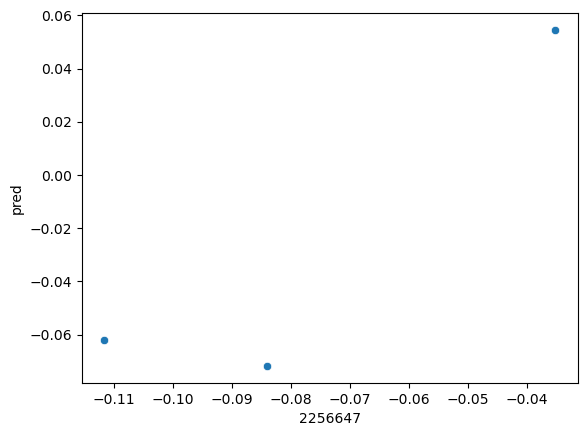

In [357]:
sns.scatterplot(x=2256647, y='pred', data=real)


,site,2256647
0,11,0.262418
1,12,0.195336
2,2,0.253163
3,33,0.518417
4,37,0.065953
5,48,0.180651


[0.02290223]


(-0.75, 0.75)

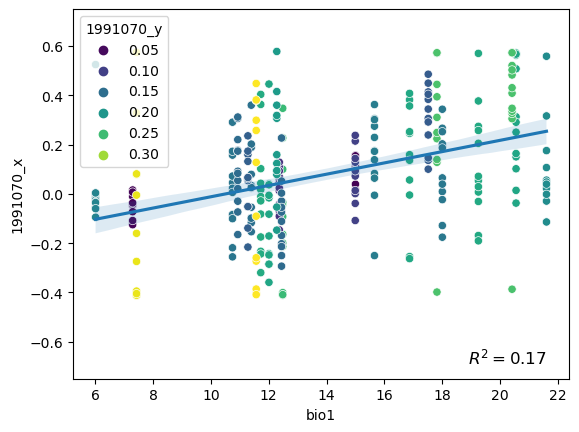

In [407]:
delta_p_ts_nomean = delta_p_ts.T

delta_p_ts_nomean['site'] = delta_p_ts_nomean.index.str.split('_').str[0]

std = delta_p_ts_nomean.groupby('site')[delta_p_ts_nomean.columns[:-1]].std()

std = std.reset_index()

delta_p_ts_nomean = delta_p_ts.T
delta_p_ts_nomean.index = delta_p_ts_nomean.index.str.split('_').str[0]

training = delta_p_ts_nomean[1991070].reset_index().merge(train_env.reset_index(), left_on = 'index', right_on = 'site')


training = training.merge(std[['site',1991070]], on ='site')

sns.scatterplot(x='bio1', y='1991070_x', data=training, hue='1991070_y', palette='viridis', legend=True)
sns.regplot(x='bio1', y='1991070_x', data=training, scatter=False)

## model 
X = training['bio1'].values.reshape(-1, 1)  # Independent variable
y = training['1991070_x'].values # Dependent variable

# Fit the linear model
model = LinearRegression().fit(X, y)

r_squared = model.score(X, y)

# Display R² on the plot
plt.text(x=max(training['bio1']), y=-0.7, s=f'$R^2 = {r_squared:.2f}$', 
         color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='right')


print(model.coef_)
plt.ylim(-0.75, 0.75)

In [480]:
delta_p_ts_nomean = delta_p_ts.T

delta_p_ts_nomean['site'] = delta_p_ts_nomean.index.str.split('_').str[0]
delta_p_ts_nomean['sample'] = delta_p_ts_nomean.index

std = delta_p_ts_nomean.groupby('site')[delta_p_ts_nomean.columns[:-2]].std()

std = std.reset_index()


In [481]:
std

,site,1268,7799,12824,17502,18855,19343,19773,19846,19860,...,3212843,3212889,3213230,3213932,3215832,3218200,3221018,3229973,3233731,3233909
0,1,0.224939,0.146781,0.110950,0.235043,0.056527,0.241039,0.185101,0.050240,0.144793,...,0.116497,0.030036,0.216254,0.136093,0.087947,0.133070,0.027412,0.279116,0.083725,0.026715
1,10,0.030283,0.229693,0.049825,0.307929,0.003608,0.262647,0.300028,0.054234,0.295576,...,0.016490,0.342274,0.076996,0.180222,0.290068,0.299234,0.162170,0.316918,0.162680,0.163029
2,13,0.087301,0.276479,0.078152,0.251265,0.006255,0.173640,0.285345,0.023856,0.253659,...,0.002858,0.223431,0.204484,0.292561,0.249266,0.303881,0.149540,0.179628,0.294990,0.153505
3,23,0.031185,0.061241,0.024857,0.036862,0.024034,0.067159,0.032180,0.024895,0.025019,...,0.026625,0.024346,0.035278,0.060481,0.025113,0.040729,0.014507,0.042987,0.021044,0.008383
4,24,0.117285,0.134800,0.248863,0.203586,0.095643,0.258696,0.136026,0.061004,0.117992,...,0.100762,0.086473,0.228006,0.179429,0.118939,0.204598,0.034594,0.194556,0.067494,0.029580
5,25,0.125250,0.112619,0.073508,0.157811,0.043704,0.170439,0.122541,0.056750,0.080830,...,0.065901,0.071997,0.195598,0.167601,0.112418,0.127461,0.051320,0.171680,0.093408,0.049579
6,26,0.042368,0.262847,0.095589,0.242842,0.006000,0.115030,0.265955,0.055635,0.282326,...,0.031151,0.274961,0.152692,0.222402,0.283209,0.243774,0.032300,0.182037,0.146160,0.023766
7,27,0.382291,0.337057,0.441592,0.159539,0.402362,0.372681,0.083877,0.452343,0.084268,...,0.399052,0.305917,0.398683,0.371938,0.049351,0.332206,0.000287,0.188620,0.087705,0.000246
8,28,0.094455,0.232551,0.113680,0.261139,0.040721,0.103735,0.203402,0.032028,0.204552,...,0.040955,0.189619,0.093093,0.158184,0.197640,0.261048,0.055514,0.247422,0.097078,0.053688
9,32,0.006919,0.206651,0.271489,0.283578,0.003551,0.040688,0.280841,0.065643,0.395427,...,0.002254,0.012274,0.336776,0.069402,0.052952,0.059081,0.002094,0.174062,0.083665,0.000705


In [482]:
delta_p_ts_nomean = delta_p_ts_nomean.merge(fc)

In [483]:
std = std[['site', 1991070]]

In [484]:
#delta_p_ts_nomean = delta_p_ts.T
#delta_p_ts_nomean.index = delta_p_ts_nomean.index.str.split('_').str[0]

training = delta_p_ts_nomean.merge(train_env.reset_index(), left_on = 'site', right_on = 'site')
#training = training[training['1991070_y']<0.2]

In [485]:
training = training[[1991070, 'site', 'sample', 'fc', 'bio1']]

In [487]:
training = training.merge(std, on ='site')

<Axes: xlabel='fc', ylabel='1991070_y'>

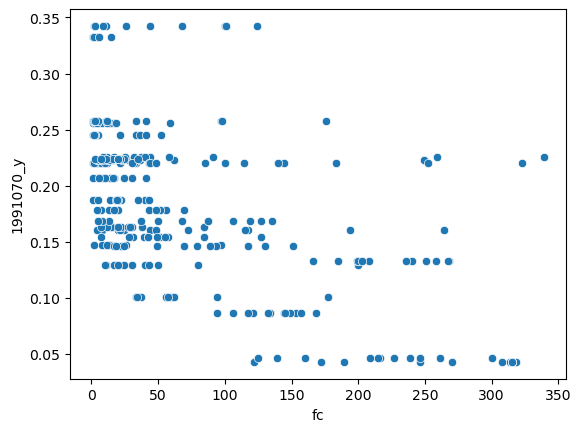

In [488]:
sns.scatterplot(data = training, x = 'fc',  y = '1991070_y')

[0.02290223]


(-0.75, 0.75)

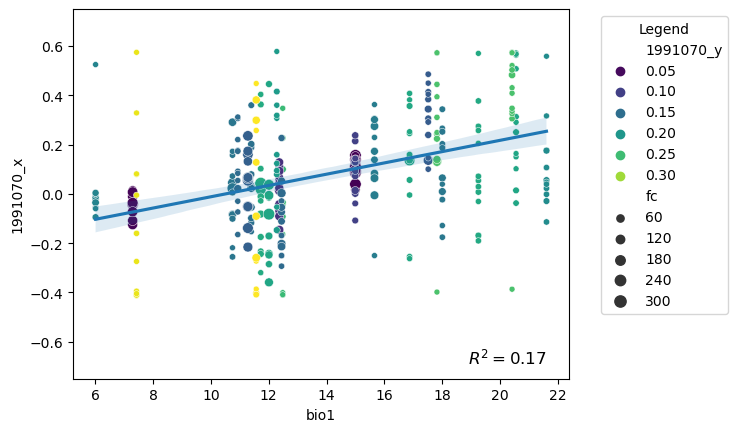

In [474]:

sns.scatterplot(x='bio1', y='1991070_x', data=training, hue='1991070_y', palette='viridis', legend=True, size = 'fc')
sns.regplot(x='bio1', y='1991070_x', data=training, scatter=False)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')


## model 
X = training['bio1'].values.reshape(-1, 1)  # Independent variable
y = training['1991070_x'].values # Dependent variable
sample_weight = training['fc']
# Fit the linear model
model = LinearRegression().fit(X, y)

r_squared = model.score(X, y)

# Display R² on the plot
plt.text(x=max(training['bio1']), y=-0.7, s=f'$R^2 = {r_squared:.2f}$', 
         color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='right')


print(model.coef_)

plt.ylim(-0.75, 0.75)

[0.01993377]


(-0.75, 0.75)

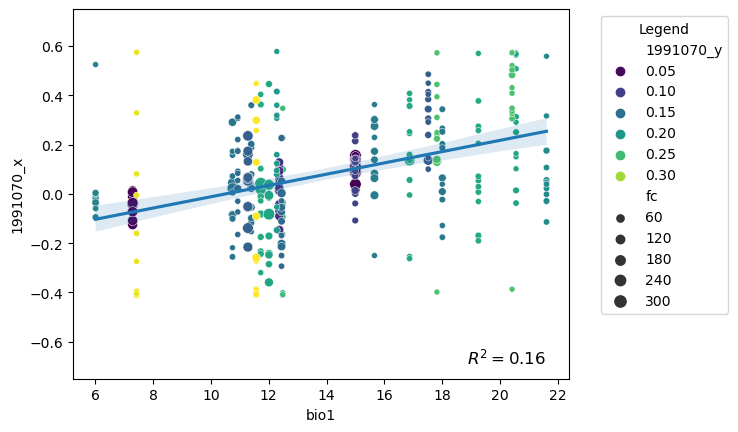

In [475]:

sns.scatterplot(x='bio1', y='1991070_x', data=training, hue='1991070_y', palette='viridis', legend=True, size = 'fc')
sns.regplot(x='bio1', y='1991070_x', data=training, scatter=False)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')


## model 
X = training['bio1'].values.reshape(-1, 1)  # Independent variable
y = training['1991070_x'].values # Dependent variable
sample_weight = training['fc']
# Fit the linear model
model = LinearRegression().fit(X, y, sample_weight = sample_weight)

r_squared = model.score(X, y)

# Display R² on the plot
plt.text(x=max(training['bio1']), y=-0.7, s=f'$R^2 = {r_squared:.2f}$', 
         color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='right')


print(model.coef_)

plt.ylim(-0.75, 0.75)

In [308]:
delta_p_tests_MEAN[2256647]

site
11   -0.022911
12   -0.035176
2     0.121860
33    0.287601
37   -0.084026
48   -0.111661
Name: 2256647, dtype: float64

[0.00809249]


(-0.75, 0.75)

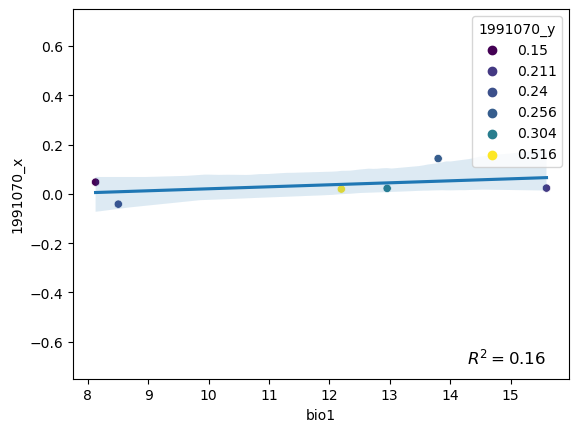

In [412]:
delta_p_tests_MEAN = delta_p_tests.T

delta_p_tests_MEAN['site'] = delta_p_tests_MEAN.index.str.split('_').str[0]

delta_p_tests_std = delta_p_tests_MEAN.groupby('site')[delta_p_tests_MEAN.columns[:-1]].std()

delta_p_tests_MEAN = delta_p_tests_MEAN.groupby('site')[delta_p_tests_MEAN.columns[:-1]].mean()


training = delta_p_tests_MEAN[1991070].reset_index().merge(test_env.reset_index()).merge(delta_p_tests_std.reset_index()[['site', 1991070]], on ='site')
training['1991070_y'] = training['1991070_y'].round(3)


#sns.regplot(x = train_env['bio1'], y = delta_p_ts_MEAN[1991070], hue = )

sns.scatterplot(x='bio1', y='1991070_x', data=training, hue='1991070_y', palette='viridis', legend=True)
sns.regplot(x='bio1', y='1991070_x', data=training, scatter=False)


## model 
X = training['bio1'].values.reshape(-1, 1)  # Independent variable
y = training['1991070_x'].values # Dependent variable

# Fit the linear model
model = LinearRegression().fit(X, y)

r_squared = model.score(X, y)

# Display R² on the plot
plt.text(x=max(training['bio1']), y=-0.7, s=f'$R^2 = {r_squared:.2f}$', 
         color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='right')

print(model.coef_)
plt.ylim(-0.75, 0.75)

In [413]:
delta_p_tests_MEAN = delta_p_tests.T

delta_p_tests_MEAN['site'] = delta_p_tests_MEAN.index.str.split('_').str[0]

delta_p_tests_std = delta_p_tests_MEAN.groupby('site')[delta_p_tests_MEAN.columns[:-1]].std()

In [418]:
delta_p_tests_MEAN[delta_p_tests_MEAN['site'] == '33'][1991070]

33_1_1    -0.361509
33_2_4     0.571196
33_2_5    -0.407807
33_2_6    -0.400452
33_2_9     0.569915
33_2_11    0.571042
33_2_12   -0.404801
Name: 1991070, dtype: float64

In [ ]:
delta_p_tests_MEAN[delta_p_tests_MEAN['site'] == '33'][1991070]

In [427]:
fc[fc['site'] == 33]

,sample_name,total_flower_counts,weighted_depth,sample_times,site,generation,plot,sampleidlist
393,33_1_1,7,1.265997,1,33,1,1,MLFH330120180607
394,33_2_4,20,5.233298,1,33,2,4,MLFH330420190426
395,33_2_5,20,6.059282,1,33,2,5,MLFH330520190528
396,33_2_6,28,4.448517,1,33,2,6,MLFH330620190418
397,33_2_9,23,4.665390,1,33,2,9,MLFH330920190418
398,33_2_11,25,6.966433,1,33,2,11,MLFH331120190418
399,33_2_12,43,7.793300,1,33,2,12,MLFH331220190418


In [415]:
test_env

,bio1
site,
11,13.801396
12,12.957162
2,15.594627
33,12.198703
37,8.130012
48,8.506768


[0.01162511]


(-0.75, 0.75)

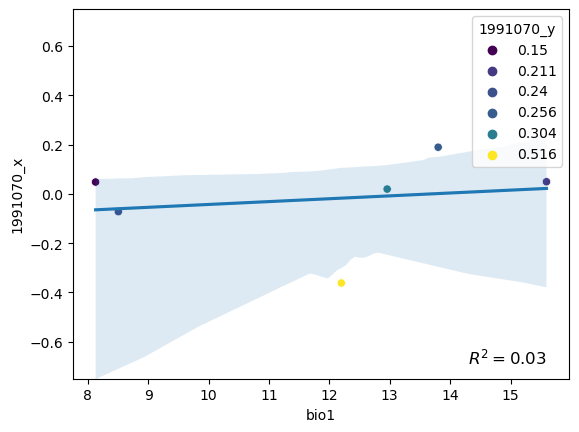

In [411]:
delta_p_tests_MEAN = delta_p_tests.T

delta_p_tests_MEAN['site'] = delta_p_tests_MEAN.index.str.split('_').str[0]

delta_p_tests_std = delta_p_tests_MEAN.groupby('site')[delta_p_tests_MEAN.columns[:-1]].std()

delta_p_tests_MEAN = delta_p_tests_MEAN.groupby('site')[delta_p_tests_MEAN.columns[:-1]].median()


training = delta_p_tests_MEAN[1991070].reset_index().merge(test_env.reset_index()).merge(delta_p_tests_std.reset_index()[['site', 1991070]], on ='site')
training['1991070_y'] = training['1991070_y'].round(3)


#sns.regplot(x = train_env['bio1'], y = delta_p_ts_MEAN[1991070], hue = )

sns.scatterplot(x='bio1', y='1991070_x', data=training, hue='1991070_y', palette='viridis', legend=True)
sns.regplot(x='bio1', y='1991070_x', data=training, scatter=False)


## model 
X = training['bio1'].values.reshape(-1, 1)  # Independent variable
y = training['1991070_x'].values # Dependent variable

# Fit the linear model
model = LinearRegression().fit(X, y)

r_squared = model.score(X, y)

# Display R² on the plot
plt.text(x=max(training['bio1']), y=-0.7, s=f'$R^2 = {r_squared:.2f}$', 
         color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='right')

print(model.coef_)
plt.ylim(-0.75, 0.75)

In [374]:
model.coef_

array([0.0261709])

In [262]:
delta_p_ts_nomean[2256647].reset_index()

,index,2256647
0,1,0.117726
1,1,0.009588
2,1,0.427333
3,1,0.154603
4,1,0.041987
...,...,...
292,60,0.096089
293,60,0.258385
294,60,0.209538
295,60,0.188312


In [261]:
delta_p_ts_nomean[2256647].reset_index().merge(test_env.reset_index(), left_on = 'index', right_on = 'site')

,index,2256647,site,bio1


In [268]:
delta_p_ts_nomean.index.unique()

Index(['1', '4', '5', '6', '9', '10', '13', '23', '24', '25', '26', '27', '28',
       '32', '42', '43', '45', '46', '49', '52', '53', '54', '55', '57', '60'],
      dtype='object')

In [370]:
training

,index,2256647_x,site,bio1,2256647_y
0,2,-0.034331,2,15.594627,0.253
1,2,-0.010618,2,15.594627,0.253
2,2,-0.096771,2,15.594627,0.253
3,2,0.081449,2,15.594627,0.253
4,2,0.594201,2,15.594627,0.253
5,2,0.342879,2,15.594627,0.253
6,2,-0.023787,2,15.594627,0.253
7,11,0.058339,11,13.801396,0.262
8,11,-0.225808,11,13.801396,0.262
9,11,-0.080334,11,13.801396,0.262


In [264]:
test_env.reset_index().dtypes

site     object
bio1    float64
dtype: object

(-0.75, 0.75)

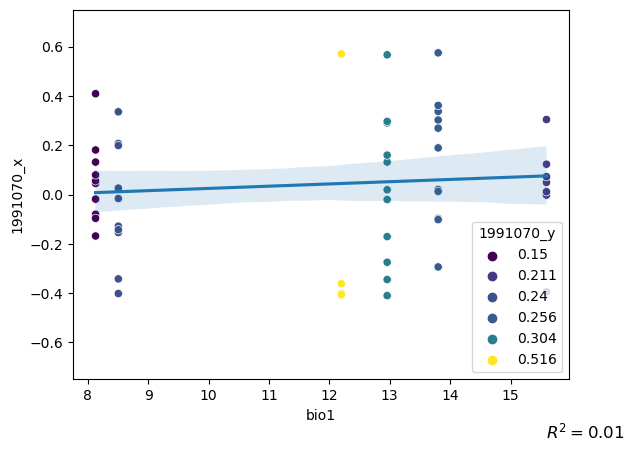

In [409]:
delta_p_tests_nomean = delta_p_tests.T

delta_p_tests_nomean['site'] = delta_p_tests_nomean.index.str.split('_').str[0]

std = delta_p_tests_nomean.groupby('site')[delta_p_tests_nomean.columns[:-1]].std()

std = std.reset_index()

delta_p_tests_nomean = delta_p_tests.T
delta_p_tests_nomean.index = delta_p_tests_nomean.index.str.split('_').str[0]

training = delta_p_tests_nomean[1991070].reset_index().merge(test_env.reset_index(), left_on = 'index', right_on = 'site')


training = training.merge(std[['site',1991070]], on ='site')
training['1991070_y'] = training['1991070_y'].round(3)
sns.scatterplot(x='bio1', y='1991070_x', data=training, hue='1991070_y', palette='viridis', legend=True)
sns.regplot(x='bio1', y='1991070_x', data=training, scatter=False)

## model 
X = training['bio1'].values.reshape(-1, 1)  # Independent variable
y = training['1991070_x'].values # Dependent variable

# Fit the linear model
model = LinearRegression().fit(X, y)

r_squared = model.score(X, y)

# Display R² on the plot
plt.text(x=max(training['bio1']), y=-1, s=f'$R^2 = {r_squared:.2f}$', 
         color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

plt.ylim(-0.75, 0.75)

,index,2256647_x,site,bio1,2256647_y
0,2,-0.034331,2,15.594627,0.253
1,2,-0.010618,2,15.594627,0.253
2,2,-0.096771,2,15.594627,0.253
3,2,0.081449,2,15.594627,0.253
4,2,0.594201,2,15.594627,0.253
5,2,0.342879,2,15.594627,0.253
6,2,-0.023787,2,15.594627,0.253
7,11,0.058339,11,13.801396,0.262
8,11,-0.225808,11,13.801396,0.262
9,11,-0.080334,11,13.801396,0.262


(-0.75, 0.75)

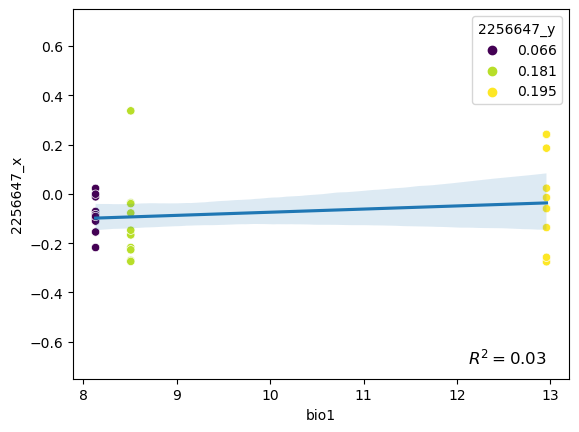

In [300]:
delta_p_ts_nomean = delta_p_tests.T

delta_p_ts_nomean['site'] = delta_p_ts_nomean.index.str.split('_').str[0]

std = delta_p_ts_nomean.groupby('site')[delta_p_ts_nomean.columns[:-1]].std()

std = std.reset_index()

delta_p_ts_nomean = delta_p_tests.T
delta_p_ts_nomean.index = delta_p_ts_nomean.index.str.split('_').str[0]

training = delta_p_ts_nomean[2256647].reset_index().merge(test_env.reset_index(), left_on = 'index', right_on = 'site')


training = training.merge(std[['site',2256647]], on ='site')
training['2256647_y'] = training['2256647_y'].round(3)
training = training[training['2256647_y']<0.2]

sns.scatterplot(x='bio1', y='2256647_x', data=training, hue='2256647_y', palette='viridis', legend=True)
sns.regplot(x='bio1', y='2256647_x', data=training, scatter=False)

## model 
X = training['bio1'].values.reshape(-1, 1)  # Independent variable
y = training['2256647_x'].values # Dependent variable

# Fit the linear model
model = LinearRegression().fit(X, y)

r_squared = model.score(X, y)

# Display R² on the plot
plt.text(x=max(training['bio1']), y=-0.7, s=f'$R^2 = {r_squared:.2f}$', 
         color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='right')


plt.ylim(-0.75, 0.75)

In [200]:
training[2256647].describe()

count    297.000000
mean       0.089674
std        0.233981
min       -0.280067
25%       -0.070316
50%        0.055548
75%        0.230424
max        0.707048
Name: 2256647, dtype: float64

In [92]:
delta_p_ts.loc[2256647,:]

1_2_2      0.117726
1_2_3      0.009588
1_3_1      0.427333
1_3_4      0.154603
1_3_5      0.041987
             ...   
60_1_8     0.096089
60_1_9     0.258385
60_1_10    0.209538
60_1_11    0.188312
60_1_12    0.164934
Name: 2256647, Length: 297, dtype: float64

In [165]:
train_env

,bio1
site,
1,10.743906
10,20.550923
13,20.412710
23,7.290877
24,6.008861
25,11.393515
26,21.603356
27,7.425145
28,16.868309


<Axes: >

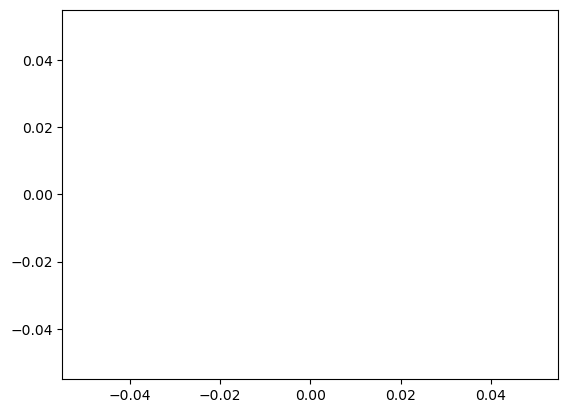

In [164]:
sns.scatterplot(x = train_env['bio1'], y = delta_p_ts.loc[2256647,:].reset_index(drop=True))

<Axes: xlabel='2256647', ylabel='2256647'>

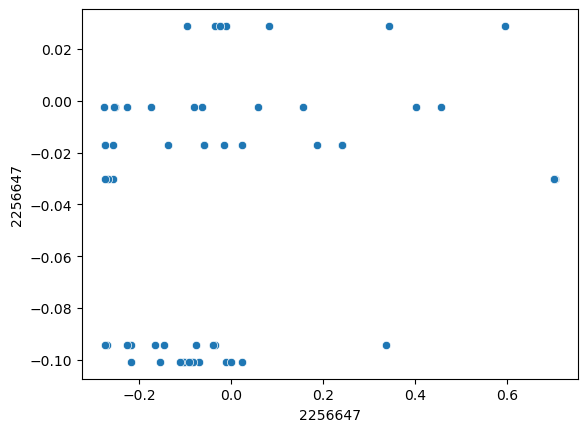

In [64]:
sns.scatterplot(x =delta_p_sel.loc[2256647,:] , y = predicted_delta_p_bio1t.loc[2256647,:])

In [63]:
r2_af_snps[r2_af_snps['r2'] > 0]

,snp,r2
5,19343,0.058494
115,487171,0.009749
146,733028,0.034882
153,795248,0.002163
159,824978,0.001801
171,1020341,0.001165
175,1096296,0.046301
179,1124278,0.003427
180,1127563,0.016581
181,1131263,0.016605


In [37]:
r2_af_d

,sample,r2
0,2_1_8,0.149522
1,2_1_9,-0.063915
2,2_1_11,-0.163451
3,2_1_12,-0.024384
4,2_2_5,0.077862
5,2_2_6,0.033699
6,2_2_7,0.084575
7,11_1_4,-0.023774
8,11_1_8,-0.029048
9,11_1_9,-0.023875


In [ ]:
37_1_1

In [34]:
delta_p_sel

,2_1_8,2_1_9,2_1_11,2_1_12,2_2_5,2_2_6,2_2_7,11_1_4,11_1_8,11_1_9,...,48_3_1,48_3_2,48_3_3,48_3_4,48_3_6,48_3_8,48_3_9,48_3_10,48_3_11,48_3_12
1268,-0.000750,0.006311,0.028119,-0.051839,-0.090549,-0.096011,0.033769,0.013920,-0.073419,-0.079799,...,-0.093976,-0.057148,-0.021525,-0.094157,-0.093527,0.078124,-0.068920,-0.052862,-0.074706,0.072184
7799,-0.114253,-0.021242,0.059747,0.060112,-0.283036,0.347039,-0.374096,0.072696,-0.353961,-0.310505,...,-0.236468,-0.089170,0.210434,0.339139,-0.317064,0.344984,0.211779,0.208624,-0.167022,0.013272
12824,-0.036833,-0.046985,-0.065898,-0.008305,-0.163873,0.391329,-0.199394,-0.040912,-0.171122,-0.205866,...,-0.232194,-0.034256,-0.188580,0.219364,-0.058954,-0.060426,-0.125333,-0.149514,-0.206662,0.124837
17502,0.063318,0.038943,-0.094431,0.017354,0.148908,-0.434229,0.337460,0.055791,-0.161612,-0.060137,...,-0.157454,-0.148562,0.403276,-0.426331,-0.432513,0.372302,0.267250,-0.276976,0.094973,-0.203804
18855,-0.025342,-0.004058,-0.047327,-0.055386,-0.071157,-0.073026,-0.064161,0.029351,-0.058959,-0.055234,...,-0.072794,-0.032729,-0.057183,-0.072135,0.040916,0.099699,-0.060582,-0.033977,-0.061800,0.219314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218200,0.067611,-0.034475,0.027297,-0.116240,-0.201078,0.048571,-0.272004,0.340700,-0.106910,0.262898,...,0.369516,-0.087479,-0.259908,0.203483,-0.190652,-0.004702,-0.154117,0.244190,0.514518,-0.096542
3221018,-0.003818,-0.014143,0.033884,-0.021374,-0.025294,-0.026391,-0.021162,-0.021711,0.024363,-0.022725,...,-0.025066,-0.016516,-0.022830,-0.025780,-0.025807,-0.026214,-0.017192,-0.013146,-0.020351,-0.019596
3229973,-0.062924,0.083225,0.002334,0.025406,-0.352380,-0.179592,-0.348781,0.043545,-0.358276,-0.049143,...,-0.177613,0.194121,0.095300,-0.286857,-0.337988,-0.047363,-0.416779,0.348435,0.213238,0.098920
3233731,-0.012693,0.041509,0.027305,-0.006888,-0.059744,-0.085754,0.097184,-0.069103,0.079959,-0.059019,...,-0.079122,-0.005388,-0.079101,-0.086475,-0.083295,-0.089189,-0.047479,-0.057280,-0.056591,-0.060446


In [35]:
predicted_delta_p_bio1t

,2_1_8,2_1_9,2_1_11,2_1_12,2_2_5,2_2_6,2_2_7,11_1_4,11_1_8,11_1_9,...,48_3_1,48_3_2,48_3_3,48_3_4,48_3_6,48_3_8,48_3_9,48_3_10,48_3_11,48_3_12
1,-0.020795,-0.020795,-0.020795,-0.020795,-0.020795,-0.020795,-0.020795,0.001607,0.001607,0.001607,...,0.067750,0.067750,0.067750,0.067750,0.067750,0.067750,0.067750,0.067750,0.067750,0.067750
6,-0.031112,-0.031112,-0.031112,-0.031112,-0.031112,-0.031112,-0.031112,0.002405,0.002405,0.002405,...,0.101366,0.101366,0.101366,0.101366,0.101366,0.101366,0.101366,0.101366,0.101366,0.101366
7,-0.027538,-0.027538,-0.027538,-0.027538,-0.027538,-0.027538,-0.027538,0.002128,0.002128,0.002128,...,0.089720,0.089720,0.089720,0.089720,0.089720,0.089720,0.089720,0.089720,0.089720,0.089720
9,0.034333,0.034333,0.034333,0.034333,0.034333,0.034333,0.034333,-0.002654,-0.002654,-0.002654,...,-0.111859,-0.111859,-0.111859,-0.111859,-0.111859,-0.111859,-0.111859,-0.111859,-0.111859,-0.111859
20,-0.017576,-0.017576,-0.017576,-0.017576,-0.017576,-0.017576,-0.017576,0.001359,0.001359,0.001359,...,0.057264,0.057264,0.057264,0.057264,0.057264,0.057264,0.057264,0.057264,0.057264,0.057264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,0.027826,0.027826,0.027826,0.027826,0.027826,0.027826,0.027826,-0.002151,-0.002151,-0.002151,...,-0.090659,-0.090659,-0.090659,-0.090659,-0.090659,-0.090659,-0.090659,-0.090659,-0.090659,-0.090659
2857,0.008036,0.008036,0.008036,0.008036,0.008036,0.008036,0.008036,-0.000621,-0.000621,-0.000621,...,-0.026182,-0.026182,-0.026182,-0.026182,-0.026182,-0.026182,-0.026182,-0.026182,-0.026182,-0.026182
2880,-0.031149,-0.031149,-0.031149,-0.031149,-0.031149,-0.031149,-0.031149,0.002408,0.002408,0.002408,...,0.101485,0.101485,0.101485,0.101485,0.101485,0.101485,0.101485,0.101485,0.101485,0.101485
2886,0.018706,0.018706,0.018706,0.018706,0.018706,0.018706,0.018706,-0.001446,-0.001446,-0.001446,...,-0.060946,-0.060946,-0.060946,-0.060946,-0.060946,-0.060946,-0.060946,-0.060946,-0.060946,-0.060946


In [32]:
delta_p_sel['37_1_1'].reset_index(drop=True)

0      0.022221
1     -0.078589
2     -0.065830
3     -0.037488
4      0.017032
         ...   
482   -0.029535
483    0.014850
484   -0.006882
485   -0.037056
486    0.005889
Name: 37_1_1, Length: 487, dtype: float64

In [33]:
predicted_delta_p_bio1t['37_1_1'].reset_index(drop=True)

0      0.072457
1      0.108408
2      0.095953
3     -0.119630
4      0.061243
         ...   
482   -0.096957
483   -0.028001
484    0.108535
485   -0.065180
486   -0.028458
Name: 37_1_1, Length: 487, dtype: float64

<Axes: xlabel='37_1_1', ylabel='37_1_1'>

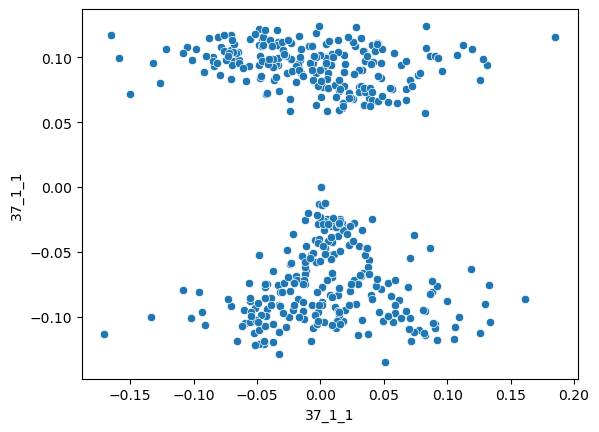

In [38]:
sns.scatterplot(x =delta_p_sel['37_1_1'].reset_index(drop=True) , y = predicted_delta_p_bio1t['37_1_1'].reset_index(drop=True))

<Axes: xlabel='2_1_8', ylabel='2_1_8'>

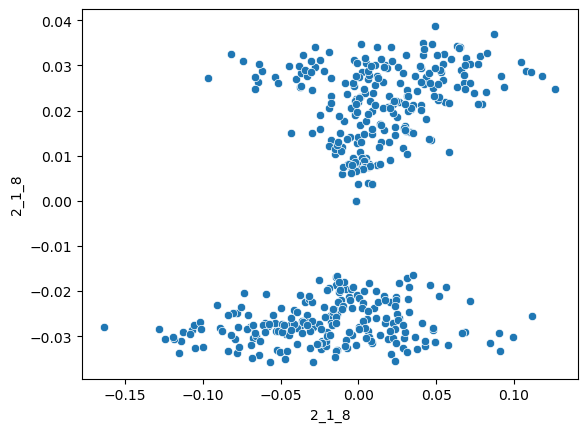

In [41]:
sns.scatterplot(x =delta_p_sel['2_1_8'].reset_index(drop=True) , y = predicted_delta_p_bio1t['2_1_8'].reset_index(drop=True))

<Axes: xlabel='2_1_8', ylabel='Count'>

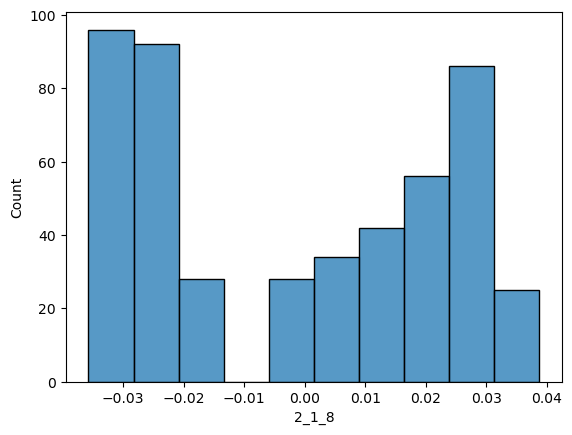

In [43]:
sns.histplot(predicted_delta_p_bio1t['2_1_8'])

<Axes: xlabel='2_1_8', ylabel='Count'>

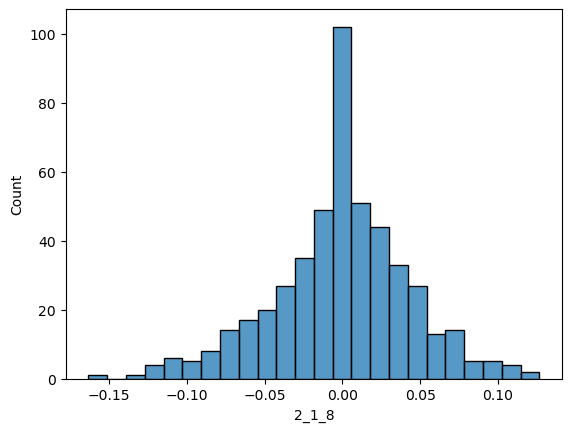

In [44]:
sns.histplot(delta_p_sel['2_1_8'])

In [45]:
delta_p_sel['2_1_8']

1268      -0.000750
7799      -0.114253
12824     -0.036833
17502      0.063318
18855     -0.025342
             ...   
3218200    0.067611
3221018   -0.003818
3229973   -0.062924
3233731   -0.012693
3233909    0.013623
Name: 2_1_8, Length: 487, dtype: float64

In [21]:
r2_af

,sample,r2
0,2_1_8,0.170232
1,2_1_9,0.042210
2,2_1_11,0.005567
3,2_1_12,0.028090
4,2_2_5,0.126529
5,2_2_6,0.087613
6,2_2_7,0.174763
7,11_1_4,0.164342
8,11_1_8,0.268028
9,11_1_9,0.481559


In [16]:
clumping

,CHR,F,SNP,BP,P,TOTAL,NSIG,S05,S01,S001,S0001,SP2,index0
0,1,1,1_64304,64304,0.0001,4,0,0,0,4,0,"1_79802(1),1_85817(1),1_194098(1),1_194356(1)",1268
1,1,1,1_352571,352571,0.0001,0,0,0,0,0,0,NONE,7799
2,1,1,1_553358,553358,0.0001,1,0,0,0,1,0,1_553359(1),12824
3,1,1,1_771525,771525,0.0001,16,0,0,0,16,0,"1_771862(1),1_775394(1),1_775705(1),1_783499(1...",17502
4,1,1,1_847069,847069,0.0001,8,0,0,0,8,0,"1_847077(1),1_847404(1),1_848013(1),1_848221(1...",18855
...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,5,1,5_26258682,26258682,0.0001,0,0,0,0,0,0,NONE,3218200
483,5,1,5_26377842,26377842,0.0001,22,0,0,0,22,0,"5_26404165(1),5_26405529(1),5_26408259(1),5_26...",3221018
484,5,1,5_26722083,26722083,0.0001,5,0,0,0,5,0,"5_26723006(1),5_26724504(1),5_26725740(1),5_26...",3229973
485,5,1,5_26901537,26901537,0.0001,1,0,0,0,1,0,5_26901571(1),3233731
